### Final Project: The Crisis in African Elephant and Rhinoceros Populations

* **Principal Investigator** : John Brake
* **Email** : jfb395@nyu.edu

**Introduction**:
Megafauna, like Elephants, Rhinoceros, or other giant animals have been inspiring zoologists and the general public for hundreds of year. They evoke wonder in anyone who looks upon them, and the groups largely vegetarian existence gives them the allure of a gentle giant. However, Megafauna populations all over the world are under siege.  Recently, their plight was brought to the forefront of global consciousness following the press surrounding the "Last Three Northern White Rhinoceros". There is great cause for concern. However, coinciding with these events, a breadth of tools for data analysis and visualization have come into existence, presenting an opportunity to present data to further illuminate the plight of these and other megafauna, hopefully inspiring action on their behalf. 

This project aims to gather important publically available data on the Loxodonta africana (African Elephant), Diceros bicornis (African Black Rhinoceros) and the Ceratotherium simum (African White Rhinoceros). This information will include their population classification over time, current population figures for Elephants, current geographic locations, and population threats. This project will also gather information about some of the legislative actions take to save these species from extinction. Through this data, this project hopes to illuminate the situation these megafauna are facing, and hopefully inspire action to help reverse the current trajectory.  

The project uses data from the [IUCN Redlist API](http://apiv3.iucnredlist.org/), the [CITES Species+ API](https://api.speciesplus.net/), the [Elephant Atlas](https://elephant-atlas.org/explore), and a recent report from the [Elephant Census](https://peerj.com/articles/2354/#supp-7). These sources provide data on (1) the population classification overtime (from least concern to extinct) (2) geographic distribution (3) export quotas (4) listings in protected species appendices and (5) current threats to these species. 

This project has 5 sections: 
* **Population Statistics**: IUCN population classification over time, specific population figures from the Elephant Census Report
* **Conservation Statistics**: CITES Quotas and CITES Listings Over Time
* **Threats**: IUCN Threats to these species
* **Geography**: IUCN Black and White Rhino Country Occurences, Elephant Stratum Geography from Elephant Atlas
* **Conclusion**


**Requisite Packages**: Below I bring bring in the necessary packages

In [1]:
import requests #To get data from the API
from pprint import pprint #For the Data Report to show the data has been retrieved
import pandas as pd # From class
import numpy as np # For performing numerical analysis
import matplotlib.pyplot as plt # Plotting

In [2]:
#These packages are necessary to plot polygons
from matplotlib.collections import PatchCollection
from shapely.geometry import Point, MultiPoint, MultiPolygon
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

### Part 1: Population Statistics

In [553]:
iucnkey = '2b3d0013bbe26c8ea04aece076127319d23670640e86b510173cf25cdb2c3c41'
#Obtaining IUCN Classifications for the African Elepant
resp = requests.get('http://apiv3.iucnredlist.org/api/v3/species/history/name/Loxodonta africana?token='
                    +iucnkey)
elephantclass=resp.json()
ele_df1 = pd.DataFrame(data=elephantclass)
ele_df2 = pd.DataFrame(data=elephantclass['result'])
frames=[ele_df1,ele_df2]
ele_df = pd.concat(frames,axis=1)
ele_df = ele_df.drop('result', axis=1)
#Converting the year column values from a string to an interger
Year=[]
for i in range(len(ele_df.year)):
    new=int(ele_df.year[i])
    Year.append(new)
ele_df['Year']=Year
ele_df=ele_df.drop('year',axis=1)

ele_df.index = ele_df.index + 1 # adding a row
ele_df.loc[7] = ['Loxodonta africana', 
                 "Less rare but believed to be threatened-requires watching", None,1965]  
ele_df = ele_df.sort_index()

In [507]:
#Obtaining IUCN Classifications for the African Black Rhino
resp2 = requests.get('http://apiv3.iucnredlist.org/api/v3/species/history/name/Diceros bicornis?token='+iucnkey)
blackrhinoclass=resp2.json()
blrhino_df1 = pd.DataFrame(data=blackrhinoclass)
blrhino_df2 = pd.DataFrame(data=blackrhinoclass['result'])
frames=[blrhino_df1,blrhino_df2]
blrhino_df = pd.concat(frames,axis=1)
blrhino_df = blrhino_df.drop('result', axis=1)
#Converting the year column values from a string to an interger
Year=[]
for i in range(len(blrhino_df.year)):
    new=int(blrhino_df.year[i])
    Year.append(new)
blrhino_df['Year']=Year
blrhino_df=blrhino_df.drop('year',axis=1)


In [508]:
#Obtaining IUCN Classifications for the African White Rhino
resp3 = requests.get('http://apiv3.iucnredlist.org/api/v3/species/history/name/Ceratotherium simum?token='+iucnkey)
whiterhinoclass=resp3.json()
whrhino_df1 = pd.DataFrame(data=whiterhinoclass)
whrhino_df2 = pd.DataFrame(data=whiterhinoclass['result'])
frames=[whrhino_df1,whrhino_df2]
whrhino_df = pd.concat(frames,axis=1)
whrhino_df = whrhino_df.drop('result', axis=1)
#Converting the year column values from a string to an interger
Year=[]
for i in range(len(whrhino_df.year)):
    new=int(whrhino_df.year[i])
    Year.append(new)
whrhino_df['Year']=Year
whrhino_df=whrhino_df.drop('year',axis=1)

In [509]:
#Combining the Elphant and Rhino DataFrames
newframes=[ele_df,blrhino_df,whrhino_df]
species_class_df=pd.concat(newframes)
species_class_df.reset_index(inplace=True)

In [510]:
#Creating Numerical Values for the Classifications to make graphing easier
code_dict={None:7,'LC':7,'LR/cd':7,'NT':6,'V':5,'VU':5,'EN':4,'E':4,'CR':3,'EW':2,'EX':1}
num_column=[]
for i in range(len(species_class_df.code)):    
    new=code_dict[species_class_df.code[i]]
    num_column.append(new)
species_class_df['Numerical Code']=num_column
species_class_df.reset_index(inplace=True)

In [511]:
species_class_df=species_class_df.drop('level_0',axis=1)

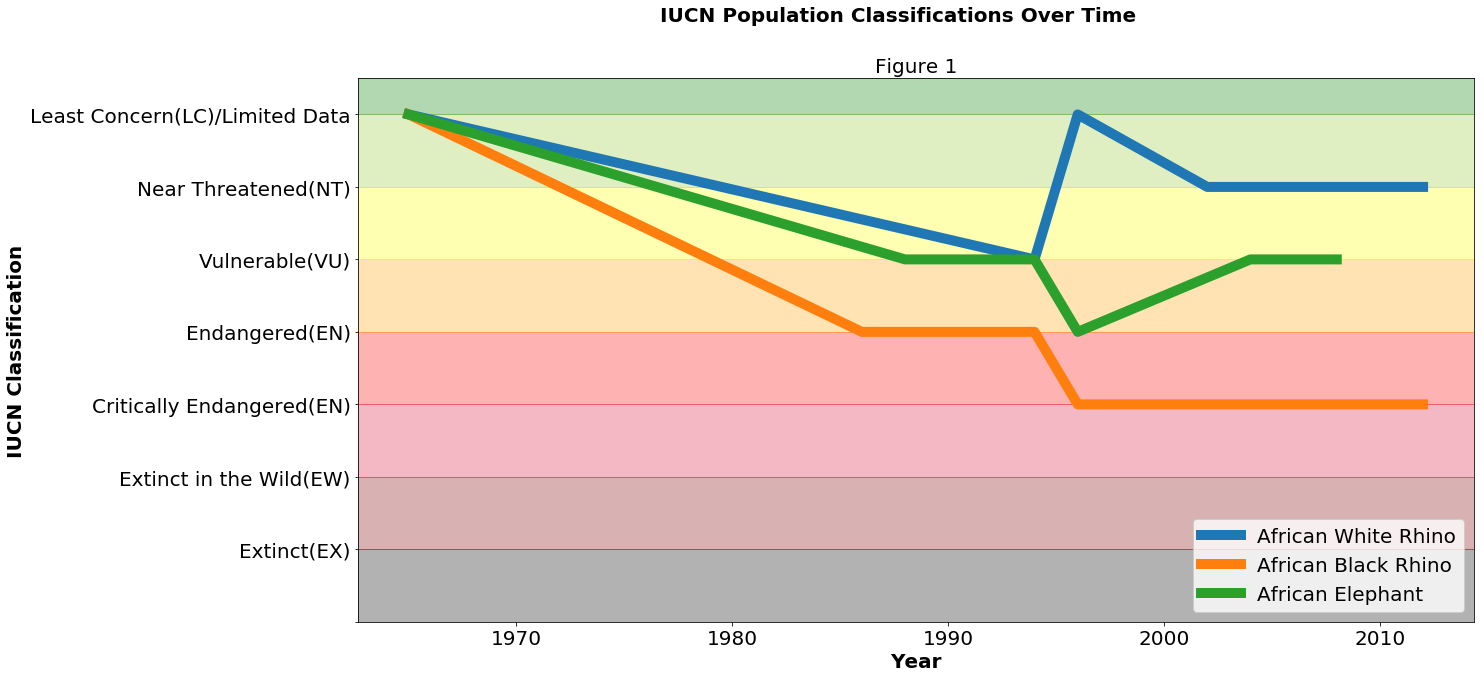

In [574]:
#Plotting the IUCN Population Classifications Overtime 
subset=species_class_df[['name','Year','Numerical Code']]
fig,ax=plt.subplots()
names=['African Elephant','African Black Rhino','African White Rhino']
subset.groupby('name').plot(x='Year',y='Numerical Code',ax=ax,figsize=(20,10),title='Figure 1',
                            legend=True,fontsize=20,lw=10.0)
ax.legend(('African White Rhino','African Black Rhino','African Elephant'),loc=4,fontsize=20)
fig.suptitle('IUCN Population Classifications Over Time', fontsize=20, fontweight='bold')
ax.set_title('Figure 1',fontsize=20)
ax.set_ylabel('IUCN Classification',fontweight='bold',fontsize=20)
ax.set_xlabel('Year',fontweight='bold',fontsize=20)
labels=['','Extinct(EX)','Extinct in the Wild(EW)','Critically Endangered(EN)',
        'Endangered(EN)','Vulnerable(VU)','Near Threatened(NT)','Least Concern(LC)/Limited Data']
plt.ylim(ymax=7.5,ymin=1.0)
plt.yticks(np.arange(0,7.5,1),labels)
#Creating the Green to Red Scale background for the graph
plt.axhspan(0,1.0,alpha=0.3,color='black')
plt.axhspan(1.0,2.0,alpha=0.3,color='maroon')
plt.axhspan(2.0,3.0,alpha=0.3,color='crimson')
plt.axhspan(3.0,4.0,alpha=0.3,color='red')
plt.axhspan(4.0,5.0,alpha=0.3,color='orange')
plt.axhspan(5.0,6.0,alpha=0.3,color='yellow')
plt.axhspan(6.0,7.0,alpha=0.3,color='yellowgreen')
plt.axhspan(7.0,7.5,alpha=0.3,color='green')
plt.show()

As can be observed from Figure 1, according to the IUCN Red List, all these species have seen downgrading in classification over the time period described. Specifically, the African Black Rhino has seen massive declines over this time period reaching critically endangered levels. 

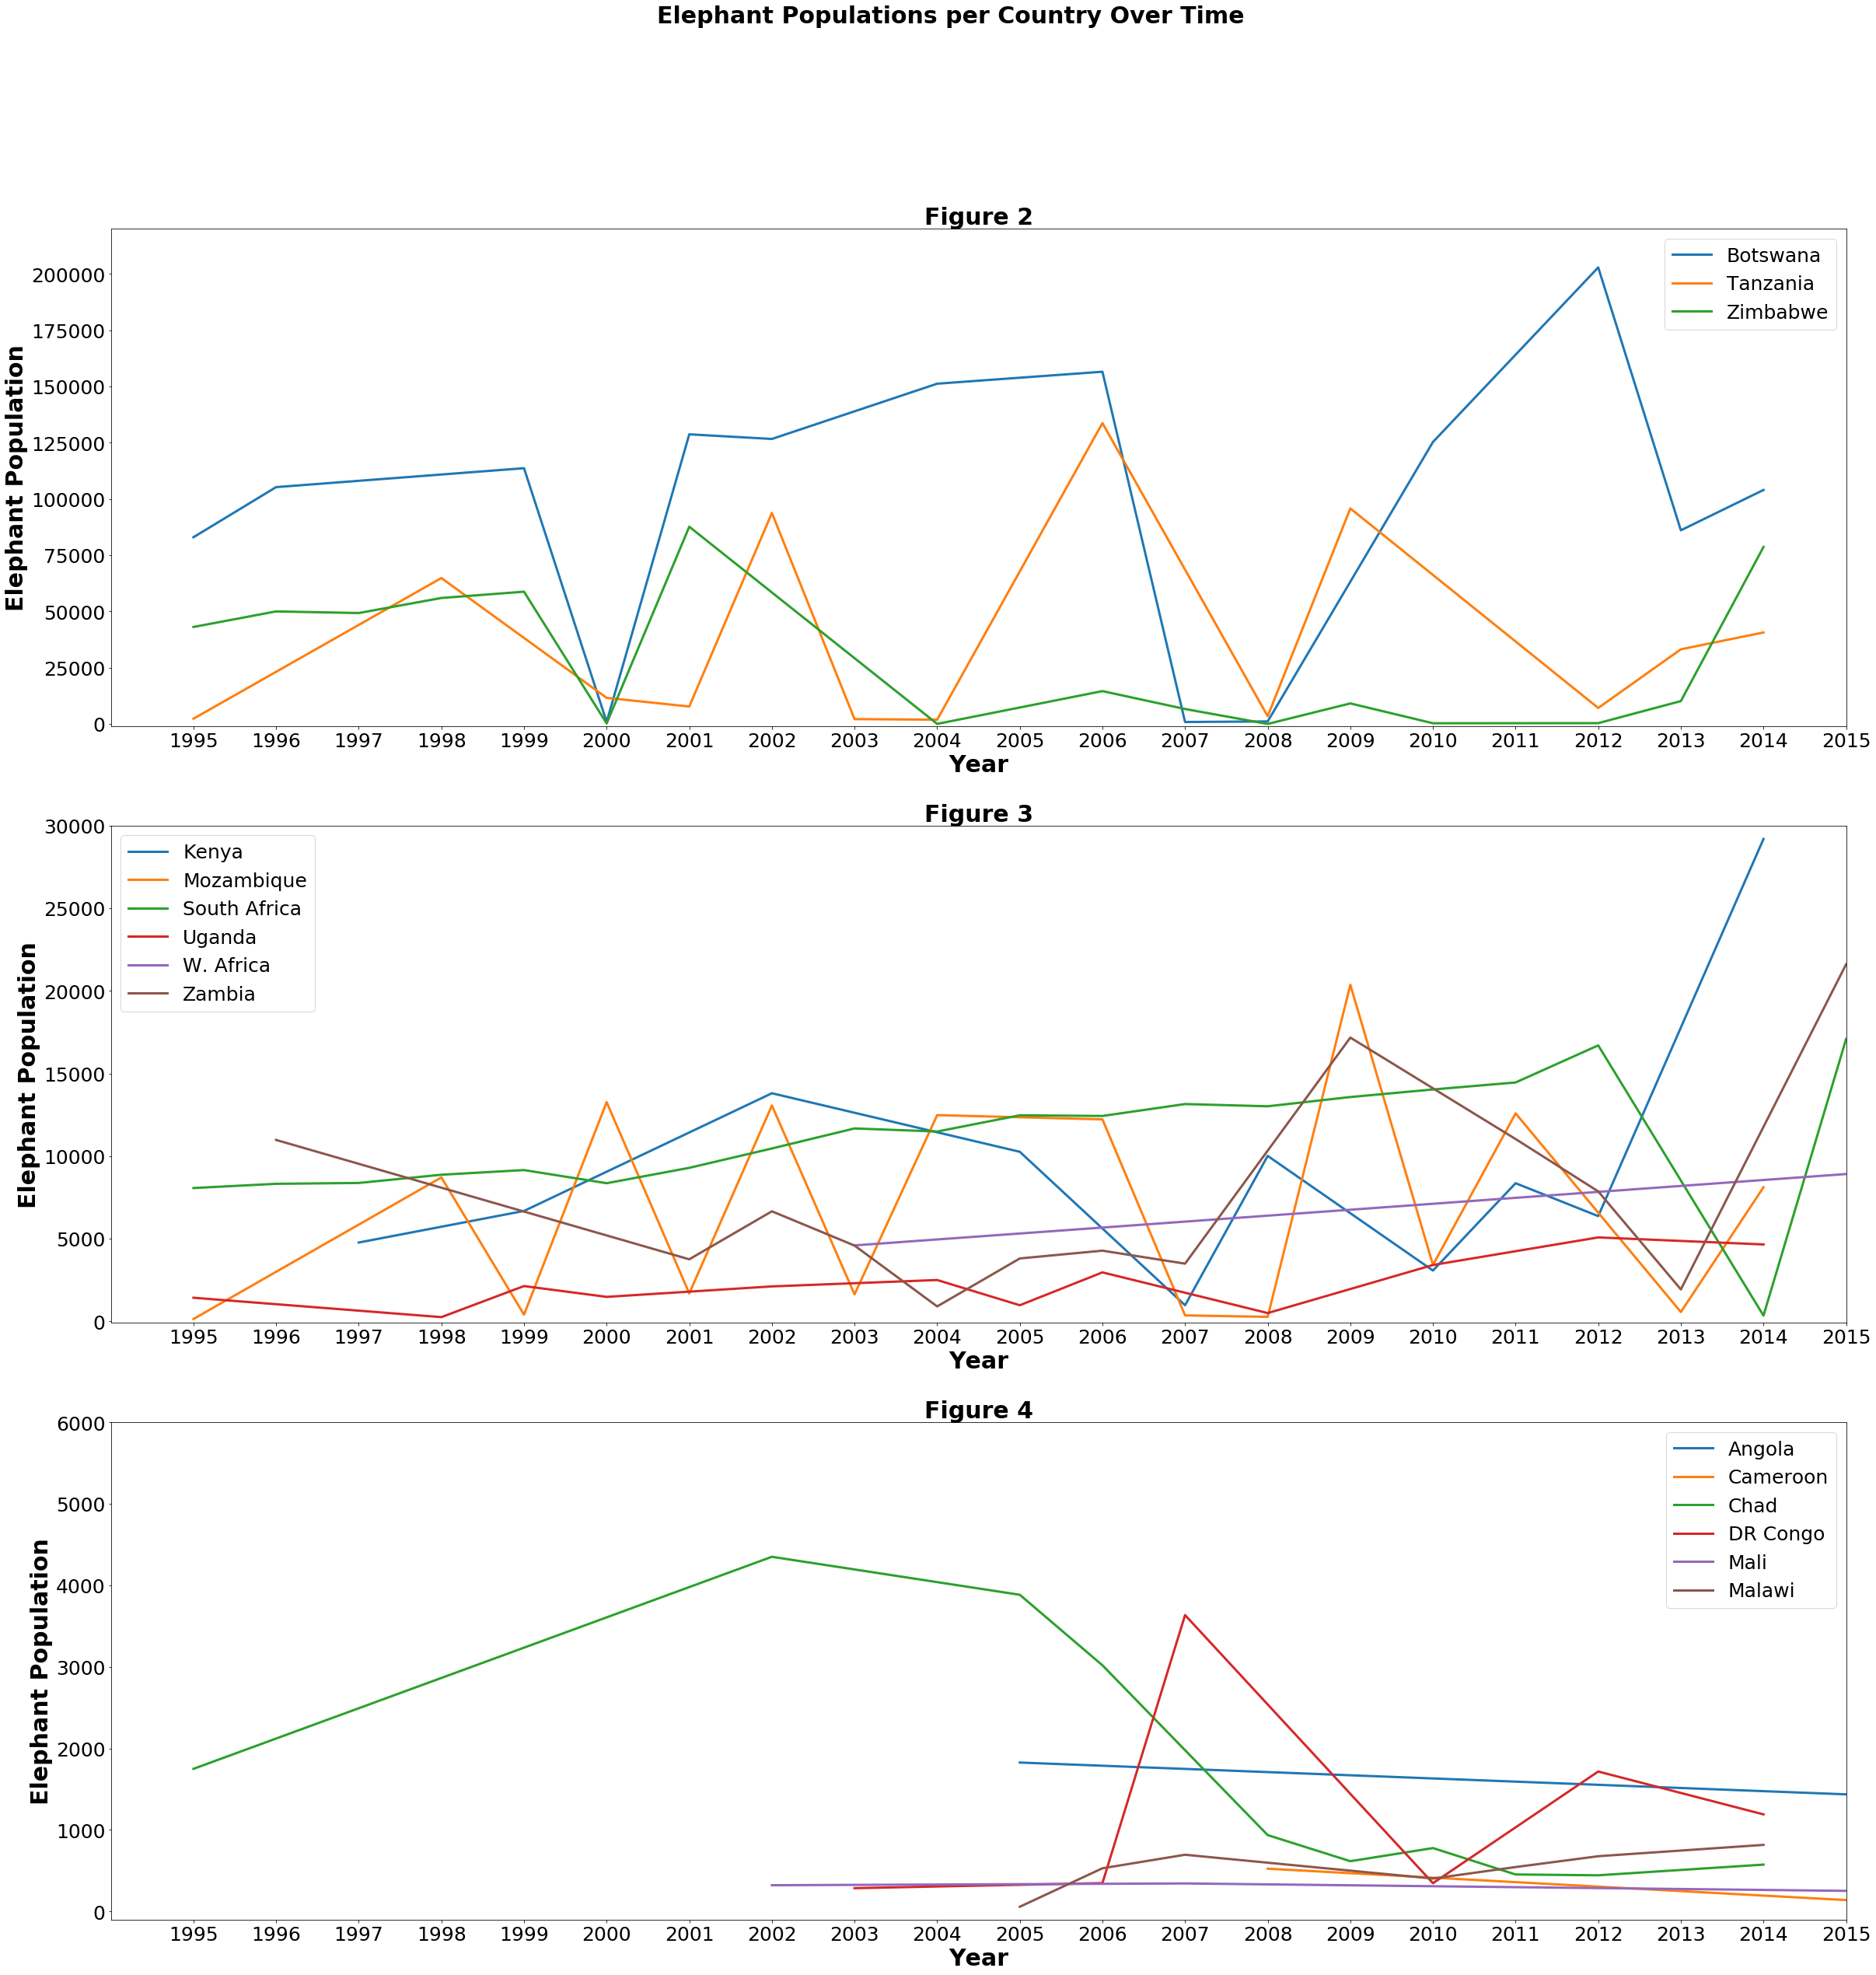

In [542]:
#Read in the Elephant Census GEC Trend Excel File
url="https://dfzljdn9uc3pi.cloudfront.net/2016/2354/1/GEC_trend_data.xlsx"
df = pd.read_excel(url)
new_df=pd.DataFrame(df.groupby(['Year','Country']).Estimate.sum())
new_df.reset_index(inplace=True)
count=new_df.groupby("Country").describe()
count.reset_index(inplace=True)
labels=[]
for i in range(len(count['Country'])):
    label=count['Country'][i]
    labels.append(label)
#Plot the Countries Elephant Populations Over Time Divided into 3 Figures of countries with
#similar populations
fig,(ax1,ax2,ax3)=plt.subplots(nrows=3, ncols=1)
fig.suptitle("Elephant Populations per Country Over Time",fontsize=30, fontweight='bold')
labels1=['Botswana','Tanzania','Zimbabwe']

for item in labels1:
    new_df[new_df['Country']==item].plot(x='Year',y='Estimate',ax=ax1,legend=True,
                                         figsize=(40,40),lw=3.0)
ax1.set_title("Figure 2",fontsize=30, fontweight='bold')
ax1.legend(labels1,fontsize=25)
ax1.tick_params(axis='both', which='major', labelsize=25)
ax1.set_xlabel('Year',fontsize=30,fontweight='bold')
ax1.set_ylabel('Elephant Population',fontsize=30,fontweight='bold')
ax1.set_ylim(-1000,220000)
ax1.set_xlim(1994,2015)
ax1.set_xticks(np.arange(1995,2016,1))

labels2=['Kenya','Mozambique','South Africa','Uganda','W. Africa','Zambia']
for item in labels2:
    new_df[new_df['Country']==item].plot(x='Year',y='Estimate',ax=ax2,legend=True,
                                         figsize=(40,40),lw=3.0)
ax2.set_title("Figure 3",fontsize=30, fontweight='bold')
ax2.legend(labels2,fontsize=25)
ax2.tick_params(axis='both', which='major', labelsize=25)
ax2.set_xlabel('Year',fontsize=30,fontweight='bold')
ax2.set_ylabel('Elephant Population',fontsize=30,fontweight='bold')
ax2.set_ylim(-100,30000)
ax2.set_xlim(1994,2015)
ax2.set_xticks(np.arange(1995,2016,1))

labels3=['Angola','Cameroon','Chad','DR Congo','Mali','Malawi']
for item in labels3:
    new_df[new_df['Country']==item].plot(x='Year',y='Estimate',ax=ax3,legend=True,
                                         figsize=(40,40),lw=3.0)
ax3.set_title("Figure 4",fontsize=30, fontweight='bold')
ax3.legend(labels3,fontsize=25)
ax3.tick_params(axis='both', which='major', labelsize=25)
ax3.set_xlabel('Year',fontsize=30,fontweight='bold')
ax3.set_ylabel('Elephant Population',fontsize=30,fontweight='bold')
ax3.set_ylim(-100,6000)
ax3.set_xlim(1994,2015)
ax3.set_xticks(np.arange(1995,2016,1))


plt.show()

The Elephant Census Report highlights the variability in the reporting overtime. Gathering information about migratory animals, despite their size, can prove quite challenging. However, despite this variability one can note that there are many countries that are observing sharp declines in Elephant populations over the observed period.

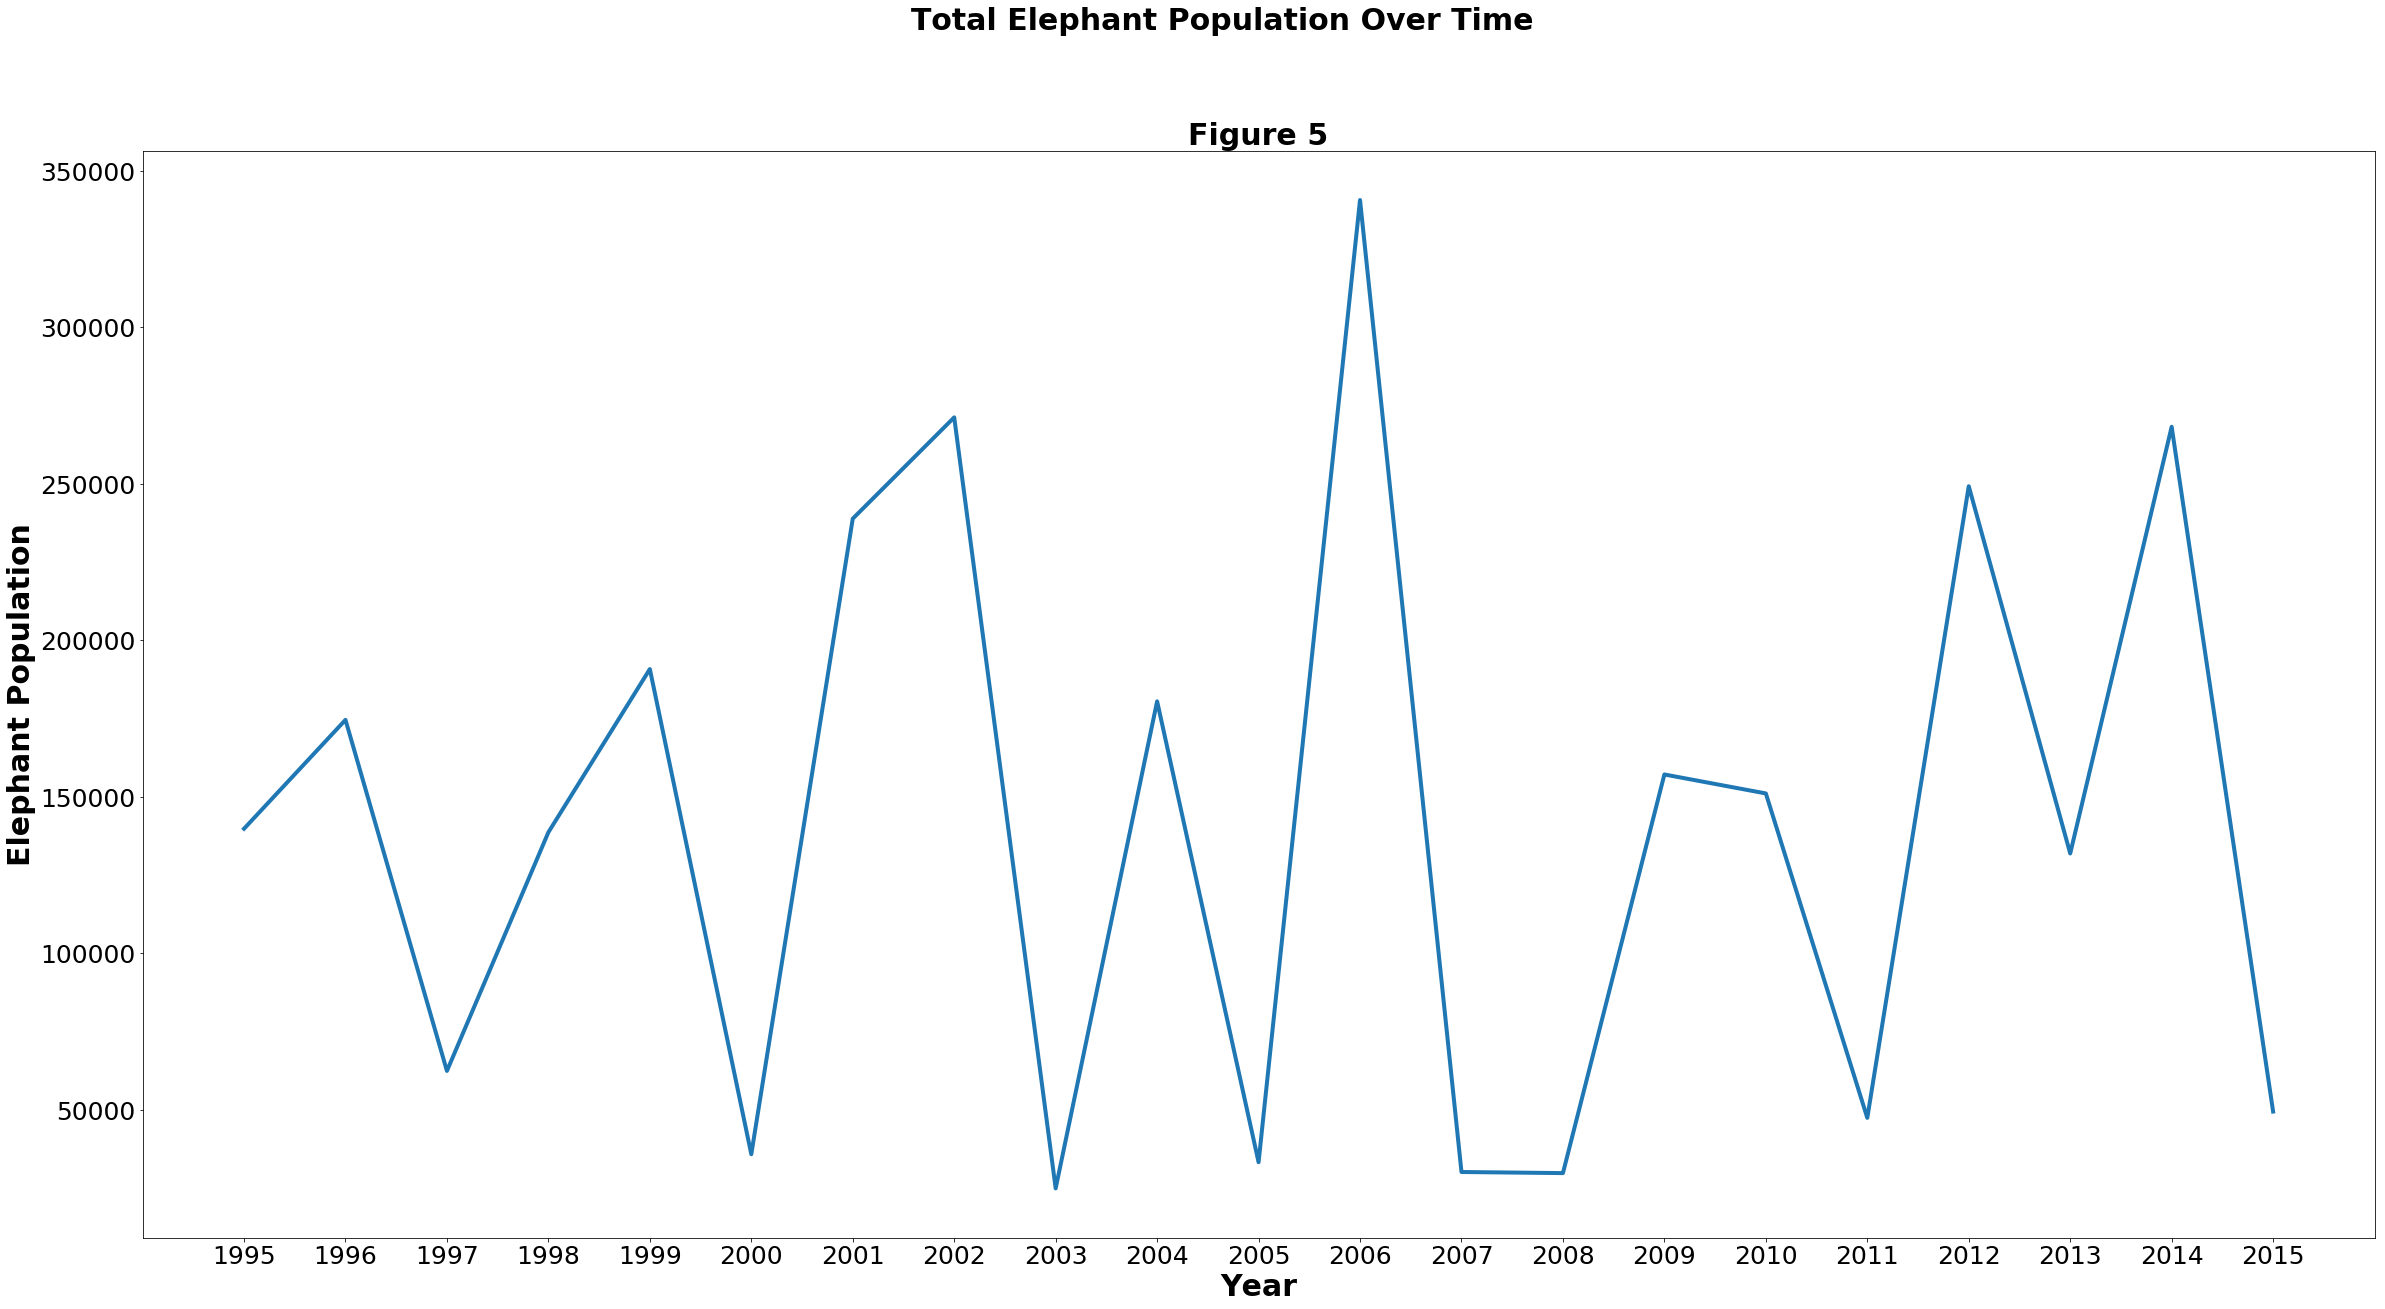

In [573]:
#Plotting the Total Elephant Population Over Time
fig,ax=plt.subplots()
new_df.groupby('Year').Estimate.sum().plot(figsize=(40,20),lw=4)
#new_df.groupby('Year').Estimate.sum().mean().plot(figsize=(40,20),lw=4)
plt.tick_params(axis='both', which='major', labelsize=25)
ax.set_xlabel('Year',fontsize=30)
fig.suptitle("Total Elephant Population Over Time",fontsize=30, fontweight='bold')
ax.set_title("Figure 5",fontsize=30, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=25)
ax.set_xlabel('Year',fontsize=30,fontweight='bold')
ax.set_ylabel('Elephant Population',fontsize=30,fontweight='bold')
plt.xticks(np.arange(1995,2016,1))
plt.show()

This figure plots the how the total population of the African Elephant, reported by the Elephant Census Report, has changed over time. This figure also highlights the variability in the reporting overtime, as methods have improved. However, despite this variability one can note that the populations are, at present, sharply declining. It is worth noting that obtaining an accurate count of the animals is challenging given that a significant portion are forest dwelling and therefore unobservable from the air, and human beings might not be able to see every savannah elephant from the heights of an aerial survey.

### Part 2: Conservation Legislation

In [575]:
#Utilizing the CITES Species + API to obtain legislative data
citeskey = 'sUUmst7B5mLG6hUxQ20wGQtt'
response2 = requests.get('https://api.speciesplus.net/api/v1/taxon_concepts?name=Loxodonta africana',
                         headers={'X-Authentication-Token': citeskey})
json_raw2=response2.json()
elid=str(json_raw2['taxon_concepts'][0]['id']) #storing Elephant Cites ID 
response3 = requests.get('https://api.speciesplus.net/api/v1/taxon_concepts?name=Diceros bicornis', 
                         headers={'X-Authentication-Token': citeskey})
json_raw3=response3.json()
blrhinoid=str(json_raw3['taxon_concepts'][0]['id']) #storing Black Rhino Cites ID 
response4 = requests.get('https://api.speciesplus.net/api/v1/taxon_concepts?name=Ceratotherium simum', 
                         headers={'X-Authentication-Token': citeskey})
json_raw4=response4.json()
whrhinoid=str(json_raw4['taxon_concepts'][0]['id']) #storing White Rhino Cites ID 
#Create a Dictionary of Cites IDs and Species Common Name
speciesid_list=[elid,blrhinoid,whrhinoid]
speciesid_dict={int(elid):'African Elephant',int(blrhinoid):'African Black Rhino',
                int(whrhinoid):'African White Rhino'}


In [543]:
#Obtain the Legislative Data for Elephants and Rhinos
r=requests.get('https://api.speciesplus.net/api/v1/taxon_concepts/'+elid+'/cites_legislation?scope=all', 
               headers={'X-Authentication-Token': citeskey})
elephant_legislation_raw=r.json()
r2=requests.get('https://api.speciesplus.net/api/v1/taxon_concepts/'+blrhinoid+'/cites_legislation?scope=all', 
                headers={'X-Authentication-Token': citeskey})
blackrhino_legislation_raw=r2.json()
r3=requests.get('https://api.speciesplus.net/api/v1/taxon_concepts/'+whrhinoid+'/cites_legislation?scope=all', 
                headers={'X-Authentication-Token': citeskey})
whiterhino_legislation_raw=r3.json()

In [544]:
# Creating a DataFrame for African Elephant Cites Quotas
ele_quota_df1=pd.DataFrame(data=elephant_legislation_raw['cites_quotas'])
total=len(elephant_legislation_raw['cites_quotas'])
cites_countrylist=[]
for i in range(total):
    a=elephant_legislation_raw['cites_quotas'][i]['geo_entity']['name']
    cites_countrylist.append(a)
ele_quota_df1['country']=cites_countrylist
ele_quota_df=ele_quota_df1
ele_quota_df=ele_quota_df.drop('geo_entity', axis=1)
#create a column of common names utilizing the dictionary that was created
#earlier
name_column=[]
for i in range(len(ele_quota_df.taxon_concept_id)):    
    new=speciesid_dict[ele_quota_df.taxon_concept_id[i]]
    name_column.append(new)
ele_quota_df['name']=name_column
#Create a year column for plotting/analysis
year_column=[]
for i in range(len(ele_quota_df.publication_date)):    
    if type(ele_quota_df.publication_date[i])!=type(None):
        new=int(ele_quota_df.publication_date[i][0:4])
        year_column.append(new)
    else:
        year_column.append('')
ele_quota_df['year']=year_column

In [545]:
# Creating a DataFrame for African Black Rhino Cites Quotas
blrhino_quota_df1=pd.DataFrame(data=blackrhino_legislation_raw['cites_quotas'])
total=len(blackrhino_legislation_raw['cites_quotas'])
cites_countrylist=[]
for i in range(total):
    a=blackrhino_legislation_raw['cites_quotas'][i]['geo_entity']['name']
    cites_countrylist.append(a)
blrhino_quota_df1['country']=cites_countrylist
blrhino_quota_df=blrhino_quota_df1
blrhino_quota_df=blrhino_quota_df.drop('geo_entity', axis=1)
#create a column of common names utilizing the dictionary that was created
#earlier
name_column=[]
for i in range(len(blrhino_quota_df.taxon_concept_id)):    
    new=speciesid_dict[blrhino_quota_df.taxon_concept_id[i]]
    name_column.append(new)
blrhino_quota_df['name']=name_column
#Create a year column for plotting/analysis
year_column=[]
for i in range(len(blrhino_quota_df.publication_date)):    
    if type(blrhino_quota_df.publication_date[i])!=type(None):
        new=int(blrhino_quota_df.publication_date[i][0:4])
        year_column.append(new)
    else:
        year_column.append('')
blrhino_quota_df['year']=year_column
#No Cites Quotas exist for the White Elephant

In [546]:
#Combining the Elephant Quota and the Black Rhino Quota DataFrames
newframes1=[ele_quota_df,blrhino_quota_df]
species_quota_df=pd.concat(newframes1)

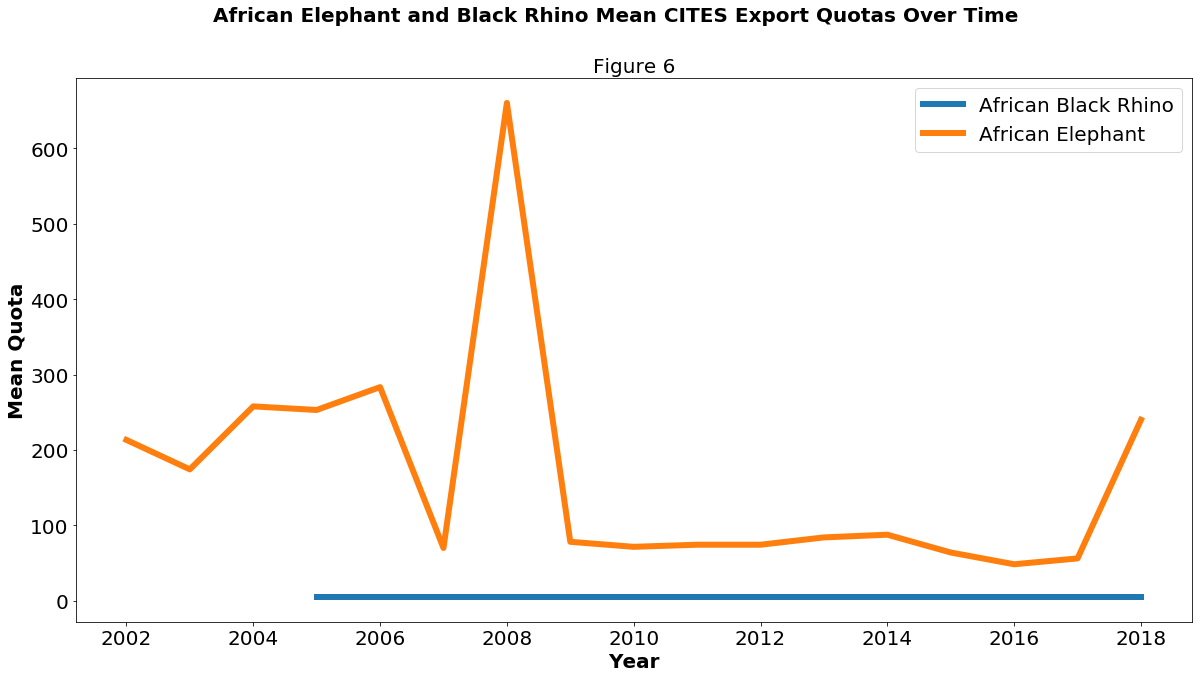

In [547]:
#Creating a new dataframe from the previously created combined Dataframe
#grouping the data by name and obtaining the mean quota per year
newdf=pd.DataFrame(data=species_quota_df.groupby(['name','year']).quota.mean())
newdf.reset_index(inplace=True)
newdf1=newdf.drop(30,axis=0)
#plotting this new dataframe
fig,ax=plt.subplots()
newdf1.groupby('name').plot(x='year',y='quota',
   ax=ax,figsize=(20,10),title='Figure 6',legend=True,fontsize=20,lw=6.0)
ax.legend(('African Black Rhino','African Elephant',),loc=1,fontsize=20)
fig.suptitle('African Elephant and Black Rhino Mean CITES Export Quotas Over Time', fontsize=20, fontweight='bold')
ax.set_title('Figure 6',fontsize=20)
ax.set_ylabel('Mean Quota',fontweight='bold',fontsize=20)
ax.set_xlabel('Year',fontweight='bold',fontsize=20)

#Create an Arrow point to peak and to the Rhino Quota
plt.show()

In Figure 6 we observe how the aggregate CITES export quotas for Elephants and Black Rhinos have changed over time. CITES export quotas for these animals are quotas in ivory export. We can see the that Black Rhino quotas have remained the same for theier whole history, while the Elephant quotes are much more variable. This variability is attributed to the fact that each party country is able to, within limits set by the CITES convention, set their own quotas. In other words, as long as these quotas are not damaging to species longevity as determined by the Convention's scientific authority, countries can derermine their own export quotas and report said exports to CITES authorties. It is heartening to see that the quotas have decreased significantly since their 2008 peak, highlighting a renewed desire by governments in conserving these animals. 

In [576]:
# Creating a DataFrame for African Elephant Cites Listing
ele_list_df1=pd.DataFrame(data=elephant_legislation_raw['cites_listings'])
total=len(elephant_legislation_raw['cites_listings'])
cites_countrylist=[]
for i in range(total):
    if 'party'in elephant_legislation_raw['cites_listings'][i].keys():
        a=elephant_legislation_raw['cites_listings'][i]['party']['name']
        cites_countrylist.append(a)
    else:
        cites_countrylist.append('')
ele_list_df2=pd.DataFrame(data=cites_countrylist)
frames10=[ele_list_df1,ele_list_df2]
ele_list_df=pd.concat(frames10,axis=1)
ele_list_df=ele_list_df.drop('party', axis=1)
#create a column of common names utilizing the dictionary that was created
#earlier
name_column=[]
for i in range(len(ele_list_df.taxon_concept_id)):    
    new=speciesid_dict[ele_list_df.taxon_concept_id[i]]
    name_column.append(new)
ele_list_df['name']=name_column
#Create a year column for easier plotting
year_column=[]
for i in range(len(ele_list_df.effective_at)):    
    new=int(ele_list_df.effective_at[i][0:4])
    year_column.append(new)
ele_list_df['year']=year_column


In [577]:
# Creating a DataFrame for African Black Rhino Cites Listing
blrhino_list_df1=pd.DataFrame(data=blackrhino_legislation_raw['cites_listings'])
total=len(blackrhino_legislation_raw['cites_listings'])
cites_countrylist=[]
for i in range(total):
    if 'party'in blackrhino_legislation_raw['cites_listings'][i].keys():
        a=blackrhino_legislation_raw['cites_listings'][i]['party']['name']
        cites_countrylist.append(a)
    else:
        cites_countrylist.append('')
blrhino_list_df2=pd.DataFrame(data=cites_countrylist)
frames10=[blrhino_list_df1,blrhino_list_df2]
blrhino_list_df=pd.concat(frames10,axis=1)
#Create a column of common names utilizing the previously created 
#dictionary
name_column=[]
for i in range(len(blrhino_list_df.taxon_concept_id)):    
    new=speciesid_dict[blrhino_list_df.taxon_concept_id[i]]
    name_column.append(new)
blrhino_list_df['name']=name_column
#Create a year column for easier plotting
year_column=[]
for i in range(len(blrhino_list_df.effective_at)):    
    new=int(blrhino_list_df.effective_at[i][0:4])
    year_column.append(new)
blrhino_list_df['year']=year_column

In [578]:
# Creating a DataFrame for African White Rhino Cites Listing
whrhino_list_df1=pd.DataFrame(data=whiterhino_legislation_raw['cites_listings'])
total=len(whiterhino_legislation_raw['cites_listings'])
cites_countrylist=[]
for i in range(total):
    if 'party'in whiterhino_legislation_raw['cites_listings'][i].keys():
        a=whiterhino_legislation_raw['cites_listings'][i]['party']['name']
        cites_countrylist.append(a)
    else:
        cites_countrylist.append('')
whrhino_list_df2=pd.DataFrame(data=cites_countrylist)
frames10=[whrhino_list_df1,whrhino_list_df2]
whrhino_list_df=pd.concat(frames10,axis=1)
#blrhino_list_df=ele_list_df.drop('party', axis=1)
#Create a column of common names utilizing the previously created 
#dictionary
name_column=[]
for i in range(len(whrhino_list_df.taxon_concept_id)):    
    new=speciesid_dict[whrhino_list_df.taxon_concept_id[i]]
    name_column.append(new)
whrhino_list_df['name']=name_column
#Create a year column for easier plotting
year_column=[]
for i in range(len(whrhino_list_df.effective_at)):    
    new=int(whrhino_list_df.effective_at[i][0:4])
    year_column.append(new)
whrhino_list_df['year']=year_column



In [579]:
#Creating a combined DataFrame for these listings
newframes1=[ele_list_df,blrhino_list_df,whrhino_list_df]
species_list_df=pd.concat(newframes1)
species_list_df.rename(columns={0: 'country'}, inplace=True)
listing_subset=species_list_df[['name','year','country','annotation']]
name_list=[]
for item in speciesid_dict.values():
    name_list.append(item)
listing_subset=listing_subset.set_index('name')
listing_total=len(listing_subset['year'])

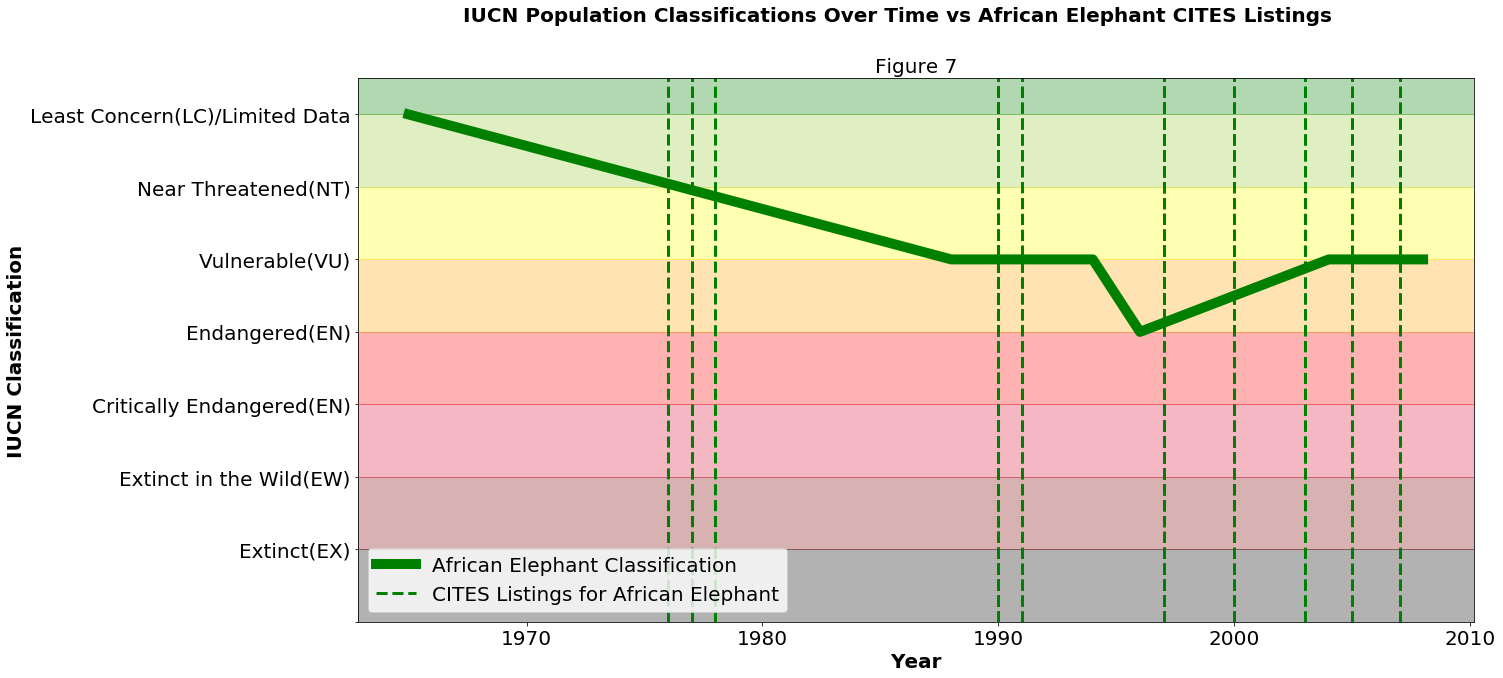

In [623]:
#Plotting the ICUN Population Classifications Overtime 
subset=species_class_df[['name','Year','Numerical Code']]
fig,ax=plt.subplots()
names=['African Elephant','African Black Rhino','African White Rhino']
subset[subset['name']=='Loxodonta africana'].plot(x='Year',y='Numerical Code',ax=ax,figsize=(20,10),
                            title='Figure 1',legend=True,fontsize=20,lw=10.0,color='green')


#ax.legend(('African White Rhino','African Black Rhino','African Elephant'),loc=4,fontsize=20)
fig.suptitle('IUCN Population Classifications Over Time vs African Elephant CITES Listings',
             fontsize=20, fontweight='bold')
ax.set_title('Figure 7',fontsize=20)
ax.set_ylabel('IUCN Classification',fontweight='bold',fontsize=20)
ax.set_xlabel('Year',fontweight='bold',fontsize=20)
labels=['','Extinct(EX)','Extinct in the Wild(EW)','Critically Endangered(EN)',
        'Endangered(EN)','Vulnerable(VU)','Near Threatened(NT)','Least Concern(LC)/Limited Data']
plt.ylim(ymax=7.5,ymin=1.0)
plt.yticks(np.arange(0,7.5,1),labels)
#Creating the Green to Red Scale background for the graph
plt.axhspan(0,1.0,alpha=0.3,color='black')
plt.axhspan(1.0,2.0,alpha=0.3,color='maroon')
plt.axhspan(2.0,3.0,alpha=0.3,color='crimson')
plt.axhspan(3.0,4.0,alpha=0.3,color='red')
plt.axhspan(4.0,5.0,alpha=0.3,color='orange')
plt.axhspan(5.0,6.0,alpha=0.3,color='yellow')
plt.axhspan(6.0,7.0,alpha=0.3,color='yellowgreen')
plt.axhspan(7.0,7.5,alpha=0.3,color='green')

#Plotting the Introduction of Elephants Cites Listings
for i in range(listing_total):
    if listing_subset.index[i]=='African Elephant':
        ax=plt.axvline(x=listing_subset['year'][i], 
            ymin=0,ymax=10,color='green', linestyle='--',linewidth=3,
            label=(str(listing_subset['year'][i])+' '+str(listing_subset['country'][i])[0:14]))
ax=plt.legend(('African Elephant Classification','CITES Listings for African Elephant'),fontsize=20)
plt.show()

In Figure 7 we can see the effect that multiple countries listing the African Elephant in the CITES Appendices had on the population classification. 

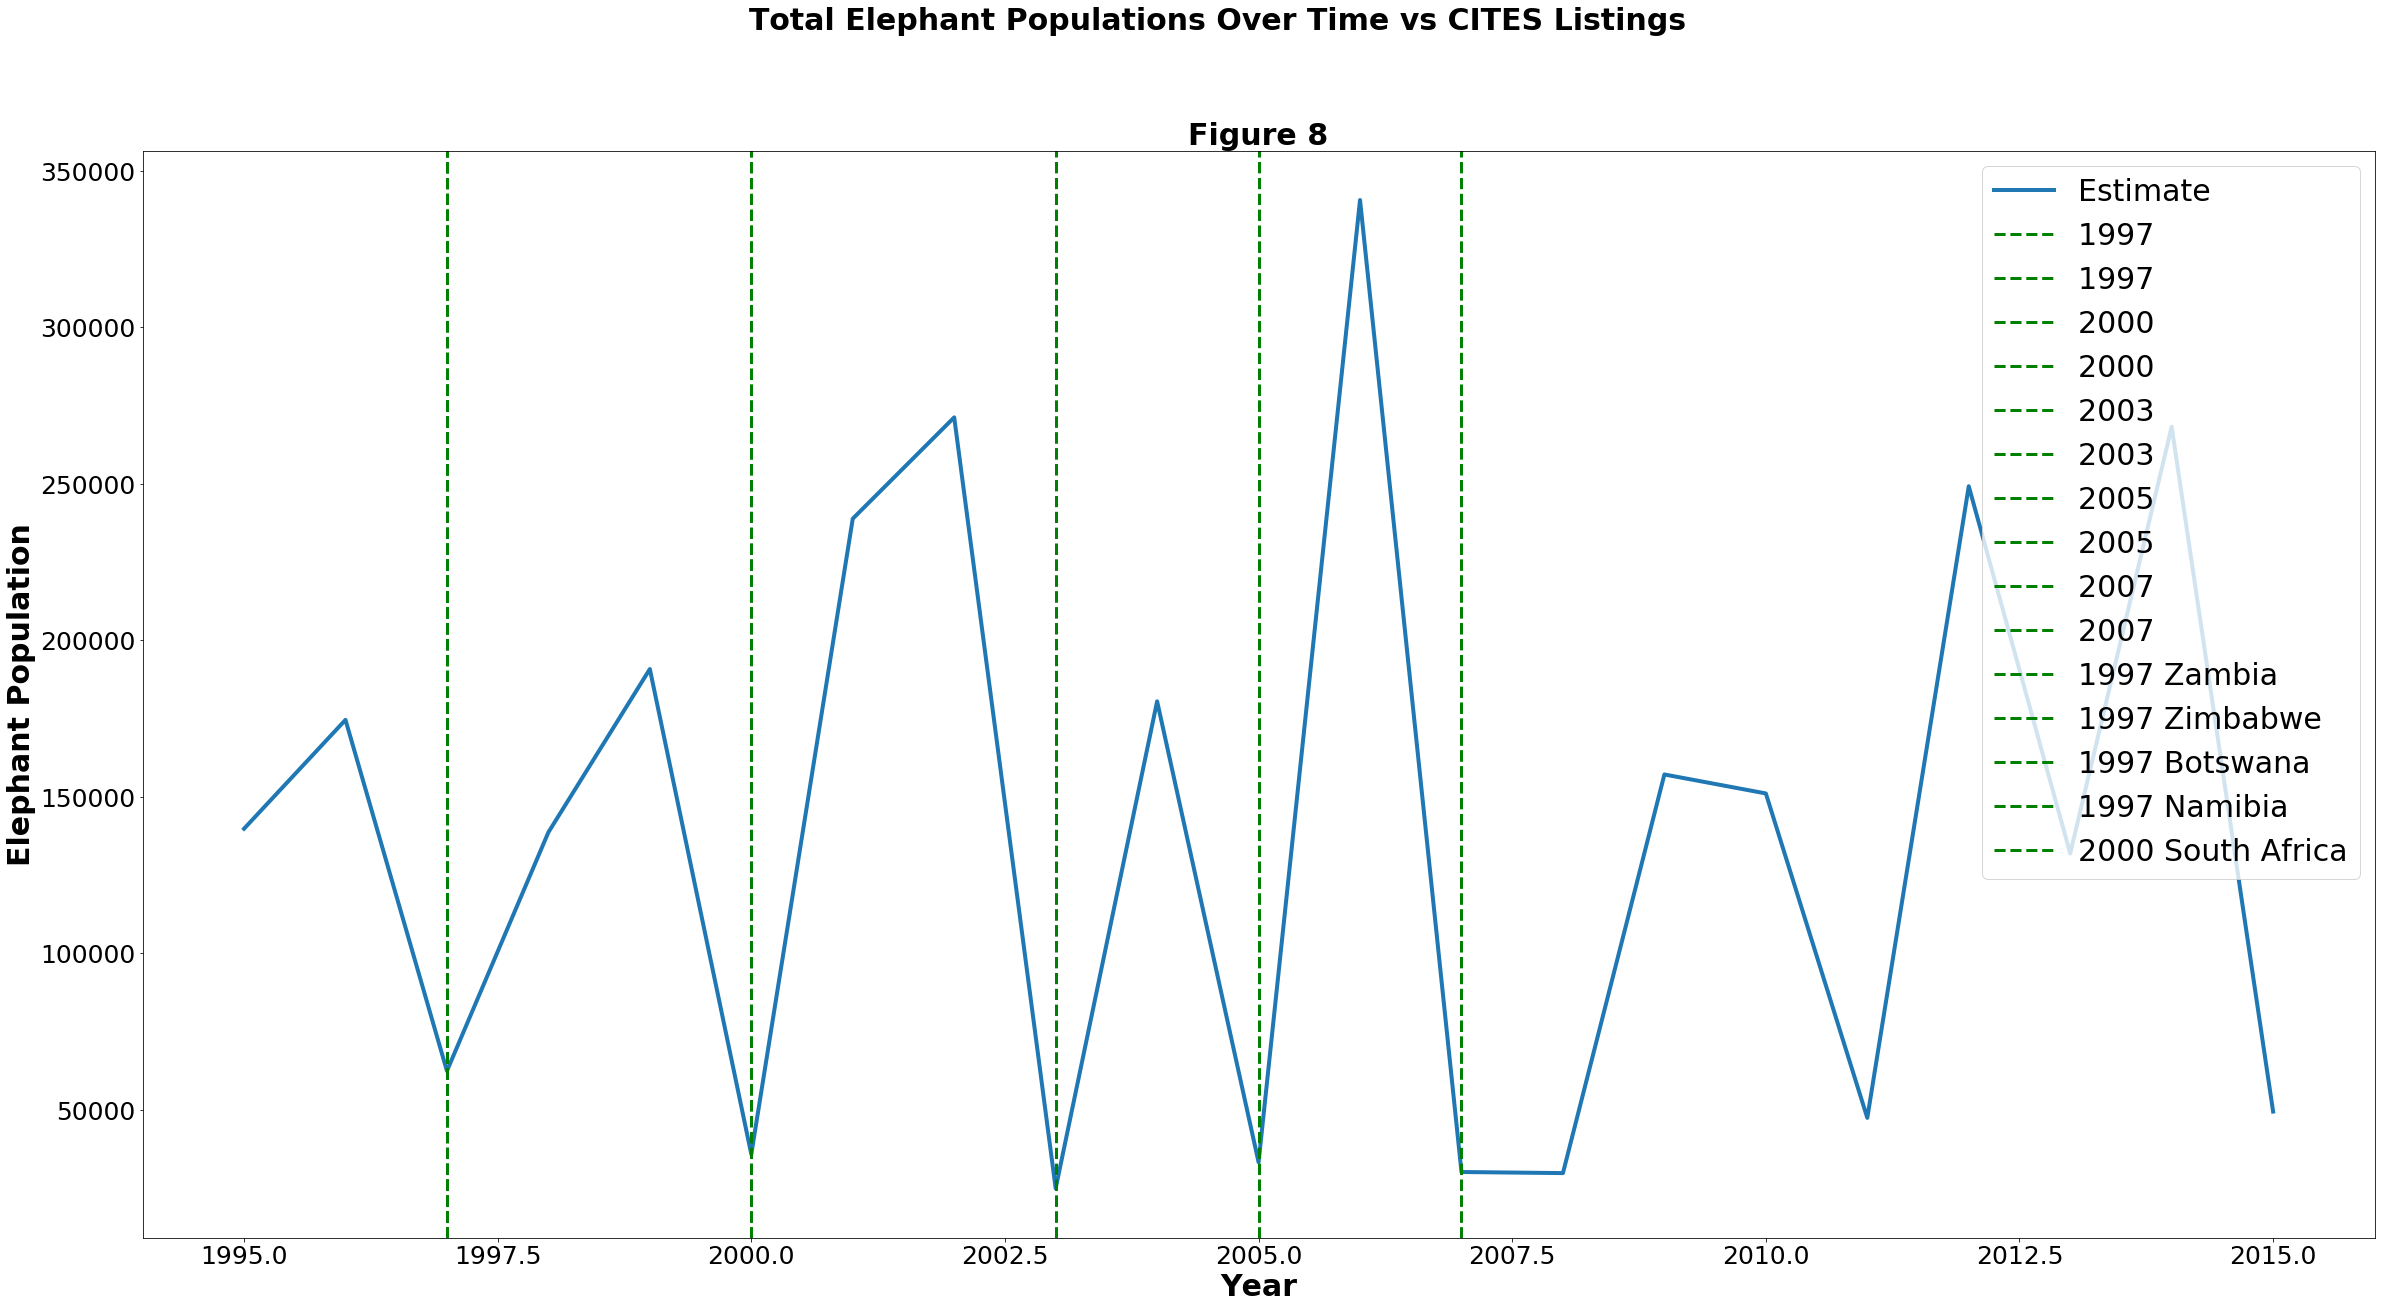

In [624]:
#Plot the Total Elephant population over time
fig,ax=plt.subplots()
new_df.groupby('Year').Estimate.sum().plot(figsize=(40,20),lw=4)
plt.tick_params(axis='both', which='major', labelsize=25)
ax.set_xlabel('Year',fontsize=30)
fig.suptitle("Total Elephant Populations Over Time vs CITES Listings ",fontsize=30, fontweight='bold')
ax.set_title("Figure 8",fontsize=30, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=25)
ax.set_xlabel('Year',fontsize=30,fontweight='bold')
ax.set_ylabel('Elephant Population',fontsize=30,fontweight='bold')
for i in range(listing_total): #Plot the Cites Listings
    if listing_subset.index[i]=='African Elephant':
        if listing_subset['year'][i]>=1995:
            ax=plt.axvline(x=listing_subset['year'][i], 
        ymin=0,ymax=10,color='green', linestyle='--',linewidth=3,
        label=(str(listing_subset['year'][i])+' '+str(listing_subset['country'][i])[0:14]))          
ax=plt.legend(fontsize=30)            
plt.show()

In Figure 8 we can see even more clearly the negligible effect that listing the African Elephant in the CITES Appendices has on the population estimates. 


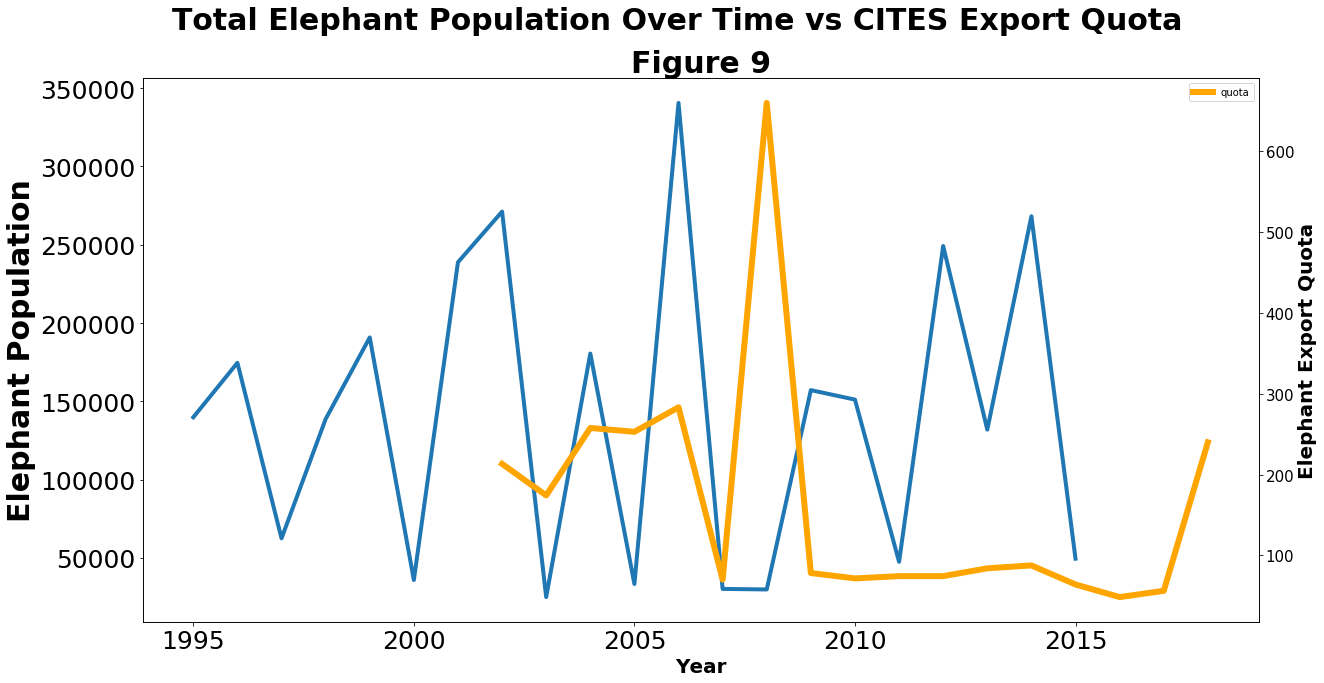

In [582]:
#Plotting the Elephant Census Elephant Total Population Over Time
fig,ax=plt.subplots()
new_df.groupby('Year').Estimate.sum().plot(figsize=(40,20),lw=4)
plt.tick_params(axis='both', which='major', labelsize=25)
ax.set_xlabel('Year',fontsize=30)
fig.suptitle("Total Elephant Population Over Time vs CITES Export Quota ",fontsize=30,
             fontweight='bold')
ax.set_title("Figure 9",fontsize=30, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=25)
ax.set_xlabel('Year',fontsize=30,fontweight='bold')
ax.set_ylabel('Elephant Population',fontsize=30,fontweight='bold')
#Plotting the Elephant CITES Export Quota
ax1=ax.twinx()
newdf1[newdf1['name']=='African Elephant'].plot(x='year',y='quota',
   ax=ax1,figsize=(20,10),fontsize=20,lw=6.0,color='orange')
ax.set_xlabel('Year',fontweight='bold',fontsize=20)          
ax1.set_ylabel('Elephant Export Quota',fontsize=20,fontweight='bold')
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1=plt.legend(loc=1)
plt.show()

In Figure 9 we can see the African Elephant population figures plotted with the African Elephant aggregate yearly CITES export quota. Taken together we can see an interesting trend: following a spike in the elephant population, countries raised their export quotas perhaps taking advantage of potentially laxer regulatory scrutiny from CITES scientists. 


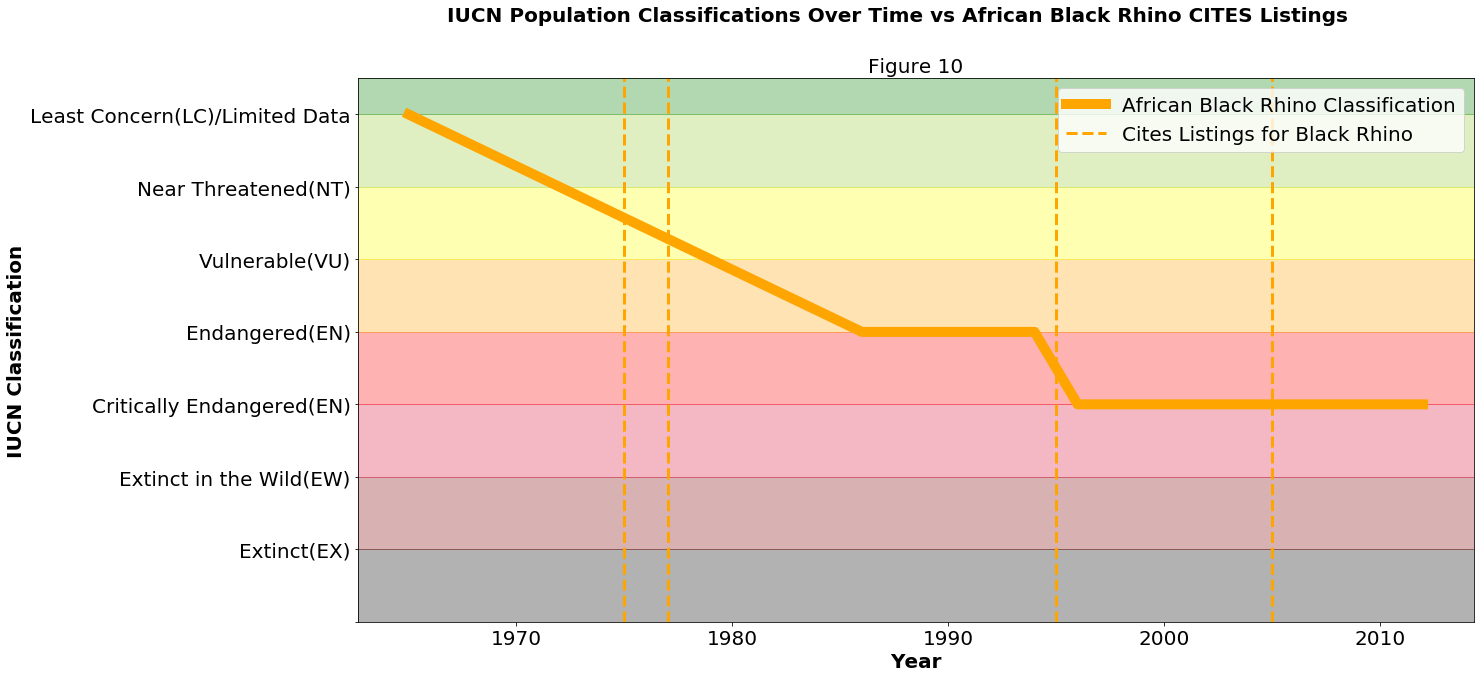

In [622]:
#Plotting the ICUN Population Classifications Overtime 
subset=species_class_df[['name','Year','Numerical Code']]
fig,ax=plt.subplots()
names=['African Elephant','African Black Rhino','African White Rhino']
subset[subset['name']=='Diceros bicornis'].plot(x='Year',y='Numerical Code',ax=ax,figsize=(20,10),
                            title='Figure 1',legend=True,fontsize=20,lw=10.0,color='orange')
fig.suptitle('IUCN Population Classifications Over Time vs African Black Rhino CITES Listings'
             , fontsize=20, fontweight='bold')
ax.set_title('Figure 10',fontsize=20)
ax.set_ylabel('IUCN Classification',fontweight='bold',fontsize=20)
ax.set_xlabel('Year',fontweight='bold',fontsize=20)
labels=['','Extinct(EX)','Extinct in the Wild(EW)','Critically Endangered(EN)'
        ,'Endangered(EN)','Vulnerable(VU)','Near Threatened(NT)','Least Concern(LC)/Limited Data']
plt.ylim(ymax=7.5,ymin=1.0)
plt.yticks(np.arange(0,7.5,1),labels)
#Creating the Green to Red Scale background for the graph
plt.axhspan(0,1.0,alpha=0.3,color='black')
plt.axhspan(1.0,2.0,alpha=0.3,color='maroon')
plt.axhspan(2.0,3.0,alpha=0.3,color='crimson')
plt.axhspan(3.0,4.0,alpha=0.3,color='red')
plt.axhspan(4.0,5.0,alpha=0.3,color='orange')
plt.axhspan(5.0,6.0,alpha=0.3,color='yellow')
plt.axhspan(6.0,7.0,alpha=0.3,color='yellowgreen')
plt.axhspan(7.0,7.5,alpha=0.3,color='green')

#Plotting the Introduction of Black Rhino Cites Listings
for i in range(listing_total):
    if listing_subset.index[i]=='African Black Rhino':
        ax=plt.axvline(x=listing_subset['year'][i], ymin=0,ymax=10,color='orange', 
            linestyle='--',linewidth=3,label=(str(listing_subset.index[i])+' '
            +str(listing_subset['country'][i])+' '+str(listing_subset['annotation'][i])))
ax=plt.legend(('African Black Rhino Classification','Cites Listings for Black Rhino'),fontsize=20)
plt.show()

In figure 10 we see the rather negligible effect that listing the African Black Rhino in the CITES appendices had on the population classification over time. 

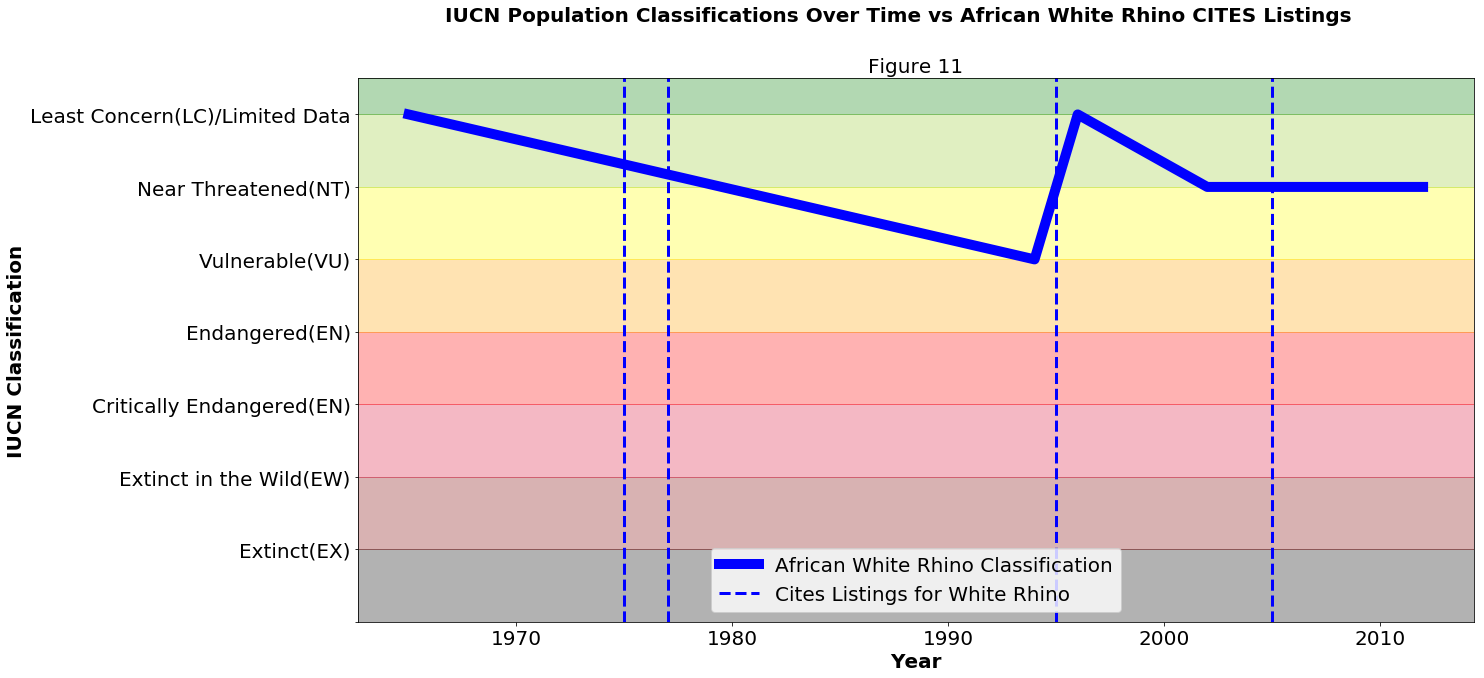

In [626]:
#Plotting the ICUN Population Classifications Overtime 
subset=species_class_df[['name','Year','Numerical Code']]
fig,ax=plt.subplots()
names=['African Elephant','African Black Rhino','African White Rhino']
subset[subset['name']=='Ceratotherium simum'].plot(x='Year',y='Numerical Code',ax=ax,figsize=(20,10),
                            title='Figure 1',legend=True,fontsize=20,lw=10.0,color='blue')
fig.suptitle('IUCN Population Classifications Over Time vs African White Rhino CITES Listings'
             , fontsize=20, fontweight='bold')
ax.set_title('Figure 11',fontsize=20)
ax.set_ylabel('IUCN Classification',fontweight='bold',fontsize=20)
ax.set_xlabel('Year',fontweight='bold',fontsize=20)
labels=['','Extinct(EX)','Extinct in the Wild(EW)','Critically Endangered(EN)'
        ,'Endangered(EN)','Vulnerable(VU)','Near Threatened(NT)','Least Concern(LC)/Limited Data']
plt.ylim(ymax=7.5,ymin=1.0)
plt.yticks(np.arange(0,7.5,1),labels)
#Creating the Green to Red Scale background for the graph
plt.axhspan(0,1.0,alpha=0.3,color='black')
plt.axhspan(1.0,2.0,alpha=0.3,color='maroon')
plt.axhspan(2.0,3.0,alpha=0.3,color='crimson')
plt.axhspan(3.0,4.0,alpha=0.3,color='red')
plt.axhspan(4.0,5.0,alpha=0.3,color='orange')
plt.axhspan(5.0,6.0,alpha=0.3,color='yellow')
plt.axhspan(6.0,7.0,alpha=0.3,color='yellowgreen')
plt.axhspan(7.0,7.5,alpha=0.3,color='green')

#Plotting the Introduction of White Rhino Cites Listings
for i in range(listing_total):
    if listing_subset.index[i]=='African White Rhino':
        ax=plt.axvline(x=listing_subset['year'][i], ymin=0,ymax=10,color='blue',
        linestyle='--',linewidth=3,label=(str(listing_subset.index[i])+' '+
        str(listing_subset['country'][i])+' '+str(listing_subset['annotation'][i])))
ax=plt.legend(('African White Rhino Classification','Cites Listings for White Rhino'),fontsize=20)
plt.show()

In Figure 11 we can see perhaps that the White Rhino has a more favorable population response to being place in the CITES appendices. However, the White Rhino Population (apart from the Northern White Rhino) have not suffered as much as the Black Rhino.

### Part 3: Threats

In [588]:
#Using the IUCN Redlist API, reading in the JSON files for the species Threats
resp7 = requests.get('http://apiv3.iucnredlist.org/api/v3/threats/species/name/Loxodonta africana?token='+iucnkey)
elephant_threats=resp7.json()
resp8 = requests.get('http://apiv3.iucnredlist.org/api/v3/threats/species/name/Diceros bicornis?token='+iucnkey)
blrhino_threats=resp8.json()
resp9 = requests.get('http://apiv3.iucnredlist.org/api/v3/threats/species/name/Ceratotherium simum?token='+iucnkey)
whrhino_threats=resp9.json()

In [589]:
#creating the dataframe for the elephant threats
ele_threat=pd.DataFrame(elephant_threats['result'])
ele_threat['Name']=elephant_threats['name']
score_list=[]
for i in range(len(ele_threat['score'])):
    score=int(ele_threat['score'][i][-1])
    score_list.append(score)
ele_threat['score_num']=score_list
common_name=[]
for j in range(len(ele_threat['Name'])):
    common='African Elephant'
    common_name.append(common)
ele_threat['common_name']=common_name

In [590]:
#creating the dataframe for the black rhino threats
blrhino_threat=pd.DataFrame(blrhino_threats['result'])
blrhino_threat['Name']=blrhino_threats['name']
score_list=[]
for i in range(len(blrhino_threat['score'])):
    score=int(blrhino_threat['score'][i][-1])
    score_list.append(score)
blrhino_threat['score_num']=score_list
common_name=[]
for j in range(len(blrhino_threat['Name'])):
    common='African Black Rhino'
    common_name.append(common)
blrhino_threat['common_name']=common_name

In [591]:
#creating the dataframe for the white rhino threats
whrhino_threat=pd.DataFrame(whrhino_threats['result'])
whrhino_threat['Name']=whrhino_threats['name']
score_list=[]
for i in range(len(whrhino_threat['score'])):
    score=int(whrhino_threat['score'][i][-1])
    score_list.append(score)
whrhino_threat['score_num']=score_list
common_name=[]
for j in range(len(whrhino_threat['Name'])):
    common='African White Rhino'
    common_name.append(common)
whrhino_threat['common_name']=common_name


In [592]:
#creating a combined data frame
frames=[ele_threat,blrhino_threat,whrhino_threat]
species_threats=pd.concat(frames)

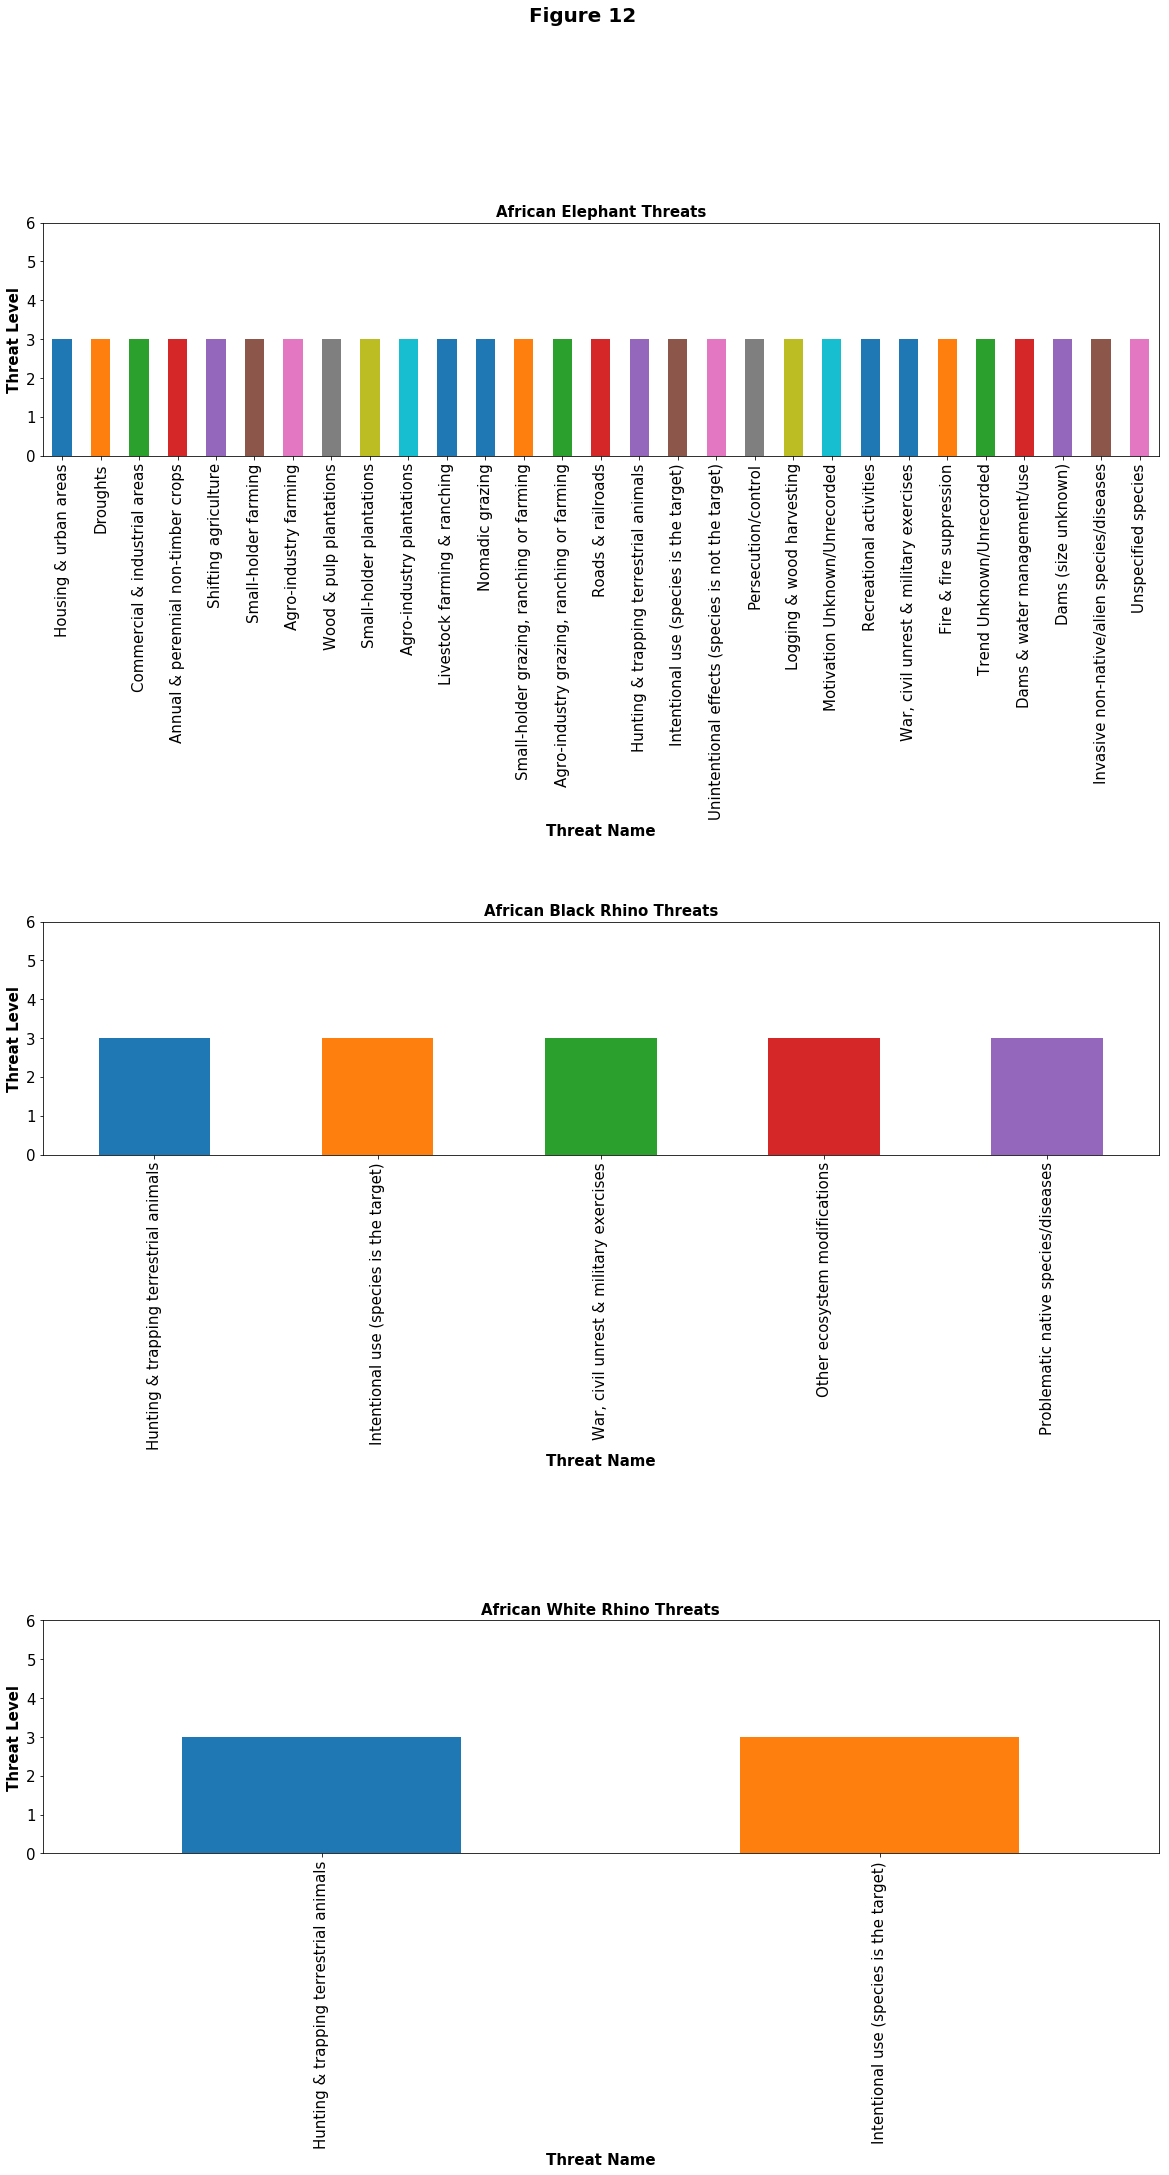

In [593]:
#Plotting all the threats
fig, (ax1,ax2,ax3)=plt.subplots(nrows=3, ncols=1)
fig.suptitle('Figure 12',fontsize=20, fontweight='bold')
species_threats[species_threats['common_name']=='African Elephant'].plot(x='title',
                    y='score_num',ax=ax1,kind='bar',figsize=(20,30),legend=False)
species_threats[species_threats['common_name']=='African Black Rhino'].plot(x='title',
                    y='score_num',ax=ax2,kind='bar',figsize=(20,30),legend=False)
species_threats[species_threats['common_name']=='African White Rhino'].plot(x='title',
                    y='score_num',ax=ax3,kind='bar',figsize=(20,30),legend=False)
ax1.set_ylim(0,6)
ax2.set_ylim(0,6)
ax3.set_ylim(0,6)

ax1.set_title("African Elephant Threats",fontsize=15,fontweight='bold')
ax2.set_title("African Black Rhino Threats",fontsize=15,fontweight='bold')
ax3.set_title("African White Rhino Threats",fontsize=15,fontweight='bold')

ax1.set_ylabel("Threat Level",fontsize=15,fontweight='bold')
ax2.set_ylabel("Threat Level",fontsize=15,fontweight='bold')
ax3.set_ylabel("Threat Level",fontsize=15,fontweight='bold')

ax1.set_xlabel("Threat Name",fontsize=15,fontweight='bold')
ax2.set_xlabel("Threat Name",fontsize=15,fontweight='bold')
ax3.set_xlabel("Threat Name",fontsize=15,fontweight='bold')

ax1.tick_params(axis='x',labelsize=15)
ax2.tick_params(axis='x',labelsize=15)
ax3.tick_params(axis='x',labelsize=15)

ax1.tick_params(axis='y',labelsize=15)
ax2.tick_params(axis='y',labelsize=15)
ax3.tick_params(axis='y',labelsize=15)


fig.subplots_adjust(hspace=2.0)
plt.show()

Figure 12 lists the current threats to the species in question, as listed by the IUCN RedList. We can see that elephants clearly have the most threats, perhaps due to the diversity of habitats (forest to savannah) in which they live. Elephants would be threatened by agriculture, logging, and nomadic grazing, where they are not being directly hunted, in addition to hunting and poaching threats where Elephants, Black Rhinos, and White Rhinos are targeted directly.

### Part 4: Geography

In [555]:
#Utilizing the IUCN RedList API to obtain the global distribution of species
#create dictionaries to create a new column for plotting
pres_dict={'Extant':1,'Extinct Post-1500':0,'Possibly Extinct':.5}
origin_dict={'Native':'green','Reintroduced':'turquoise','Introduced':'orchid'}
name_dict={'Loxodonta Africana':'African Elephant','Diceros bicornis':'African Black Rhino',
           'Ceratotherium simum':'African White Rhino'}
#create the black rhino DataFrame
resp5 = requests.get('http://apiv3.iucnredlist.org/api/v3/species/countries/name/Diceros bicornis?token='
                     +iucnkey)
blackrhinocountry = resp5.json()
blrhino_globe1=pd.DataFrame(data=blackrhinocountry)
blrhino_globe2=pd.DataFrame(data=blackrhinocountry['result'])
frames=[blrhino_globe1,blrhino_globe2]
blrhino_globe=pd.concat(frames,axis=1)
blrhino_globe = blrhino_globe.drop(['result','count'], axis=1)
pres_num=[]
for i in range(len(blrhino_globe)):
    num=pres_dict[blrhino_globe['presence'][i]]
    pres_num.append(num)
blrhino_globe['pres_num']=pres_num
origin_color=[]
for i in range(len(blrhino_globe)):
    color=origin_dict[blrhino_globe['origin'][i]]
    origin_color.append(color)
blrhino_globe['origin_color']=origin_color
common_name=[]
for i in range(len(blrhino_globe)):
    name=name_dict[blrhino_globe['name'][i]]
    common_name.append(name)
blrhino_globe['common_name']=common_name


In [627]:
#create the white rhino DataFrame 
resp6 = requests.get('http://apiv3.iucnredlist.org/api/v3/species/countries/name/Ceratotherium simum?token='+iucnkey)
whiterhinocountry = resp6.json()
whrhino_globe1=pd.DataFrame(data=whiterhinocountry)
whrhino_globe2=pd.DataFrame(data=whiterhinocountry['result'])
frames=[whrhino_globe1,whrhino_globe2]
whrhino_globe=pd.concat(frames,axis=1)
whrhino_globe = whrhino_globe.drop(['result','count'], axis=1)
pres_num=[] #create a presence number column for graphing
for i in range(len(whrhino_globe)): 
    num=pres_dict[whrhino_globe['presence'][i]]
    pres_num.append(num)
whrhino_globe['pres_num']=pres_num
origin_color=[]#create a color column for graphing
for i in range(len(whrhino_globe)):
    color=origin_dict[whrhino_globe['origin'][i]]
    origin_color.append(color)
whrhino_globe['origin_color']=origin_color
common_name=[]#create a common name column
for i in range(len(whrhino_globe)):
    name=name_dict[whrhino_globe['name'][i]]
    common_name.append(name)
whrhino_globe['common_name']=common_name

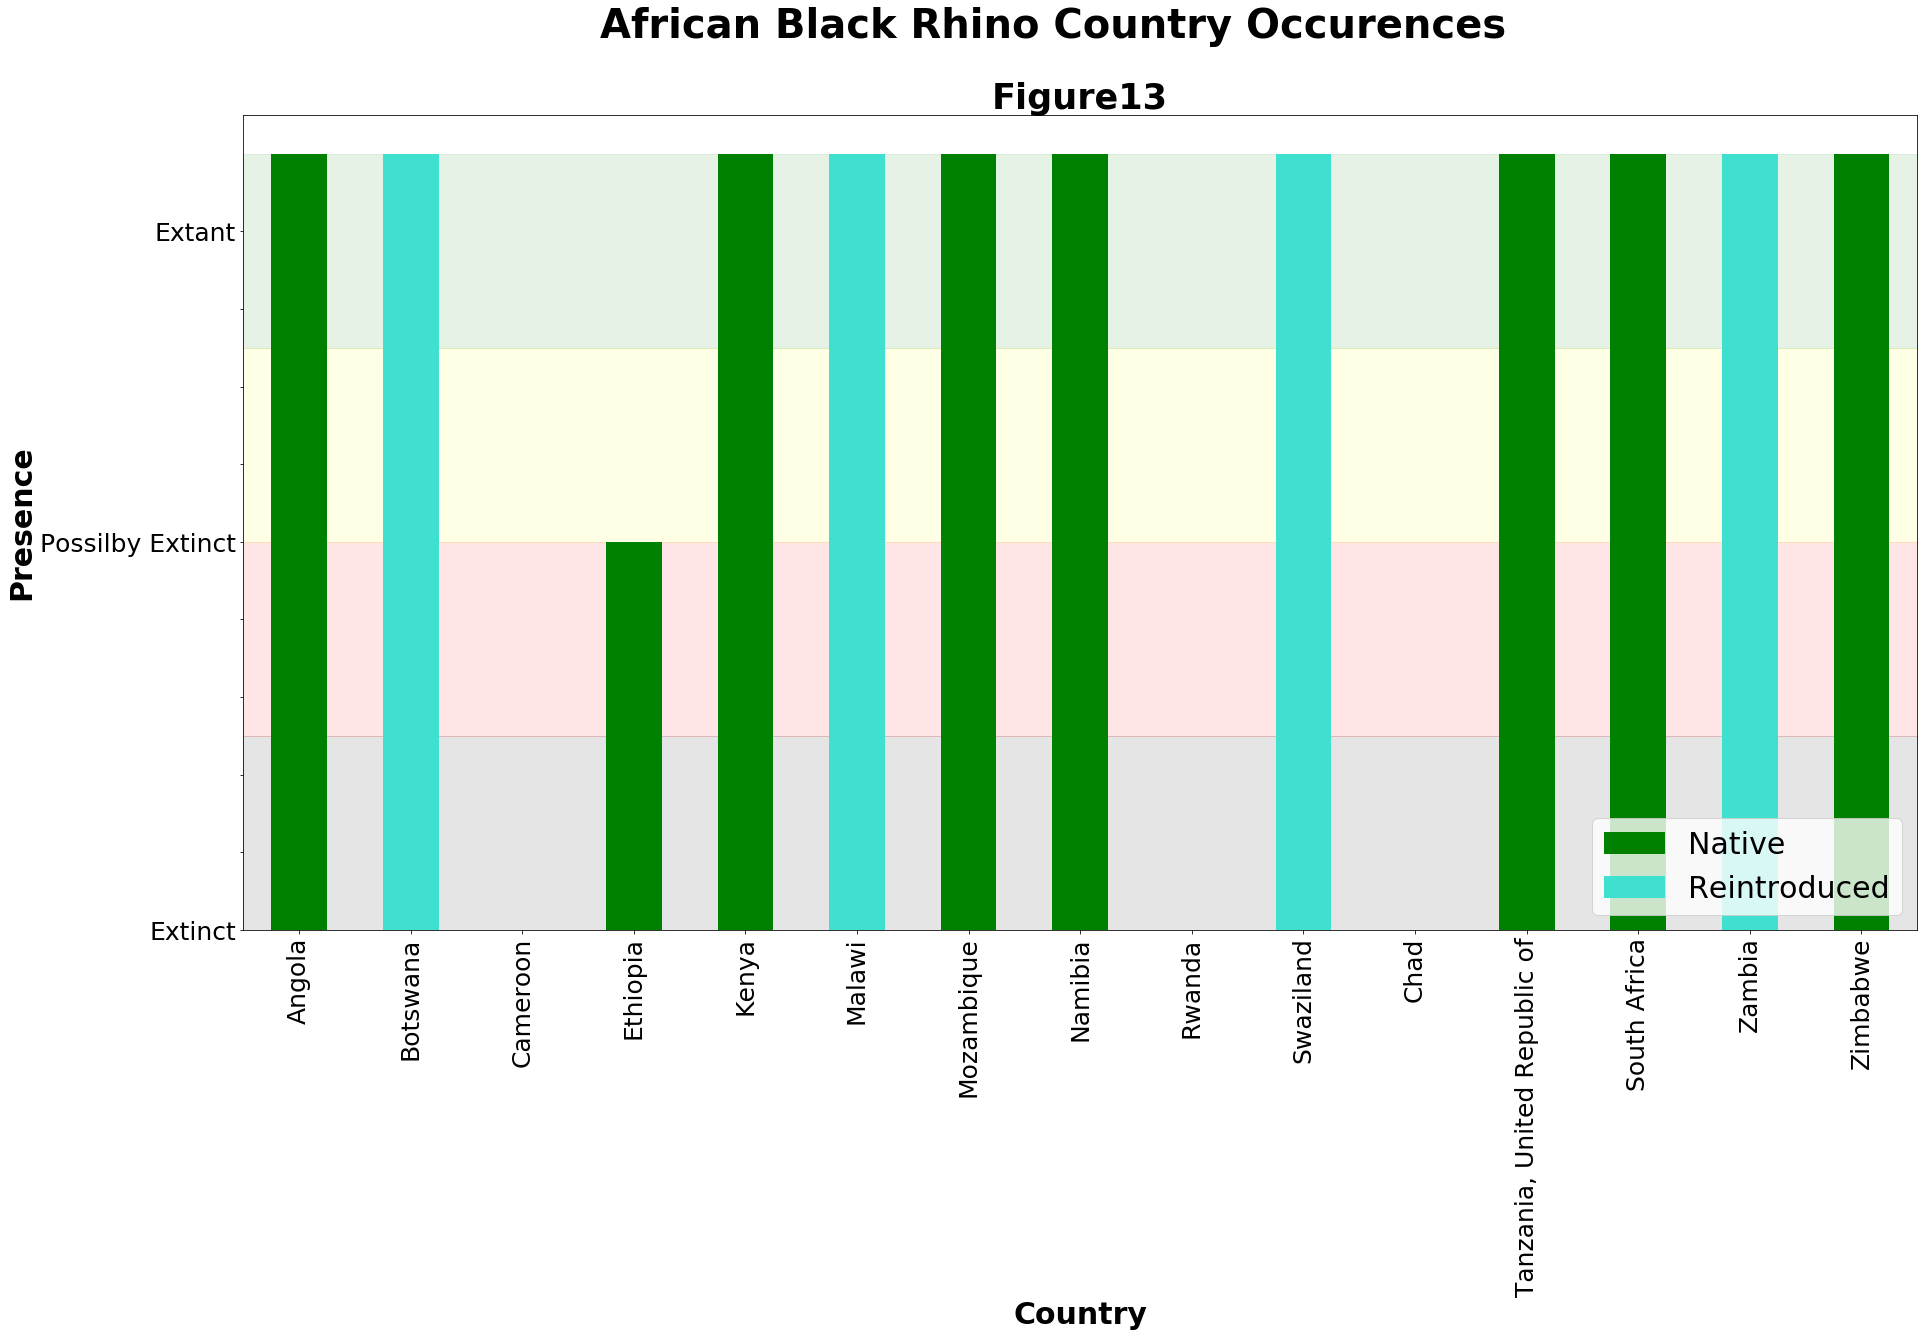

In [570]:
#creating a combined rhino DataFrame
newframes1=[blrhino_globe,whrhino_globe]
species_globe_df=pd.concat(newframes1)
globe_subset=species_globe_df[['common_name','country','origin','origin_color','presence','pres_num']]

#plotting the black rhino distribution dataframe
fig,ax=plt.subplots()
plt.rcParams["figure.figsize"] = [30,15]
plt.axhspan(0,.25,alpha=0.1,color='black')
plt.axhspan(.25,.5,alpha=0.1,color='red')
plt.axhspan(.5,.75,alpha=0.1,color='yellow')
plt.axhspan(.75,1.0,alpha=0.1,color='green')
globe_subset[globe_subset['common_name']=='African Black Rhino'].plot(x='country',y='pres_num',kind='bar',ax=ax,color=globe_subset['origin_color'])
ax.tick_params(axis='both',labelsize=25)
plt.legend(('Native','Reintroduced'),fontsize=30,loc=4)
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('green')
leg.legendHandles[1].set_color('turquoise')
leg.legendHandles[0].set_alpha(1.0)
leg.legendHandles[1].set_alpha(1.0)
ax.set_ylabel("Presence",fontsize=30,fontweight='bold')
ax.set_xlabel("Country",fontsize=30,fontweight='bold')
ax.set_title("Figure13",fontsize=35,fontweight='bold')
fig.suptitle('African Black Rhino Country Occurences',fontsize=40,fontweight='bold')
labels=['Extinct','','','','','Possilby Extinct','','','','Extant','']
plt.yticks(np.arange(0,1.0,.1),labels)

plt.show()


Figure 13 shows where the Black Rhino is currently living. It is interesting and heartening to see that where reintroduced, the Black Rhino is at least existing. 

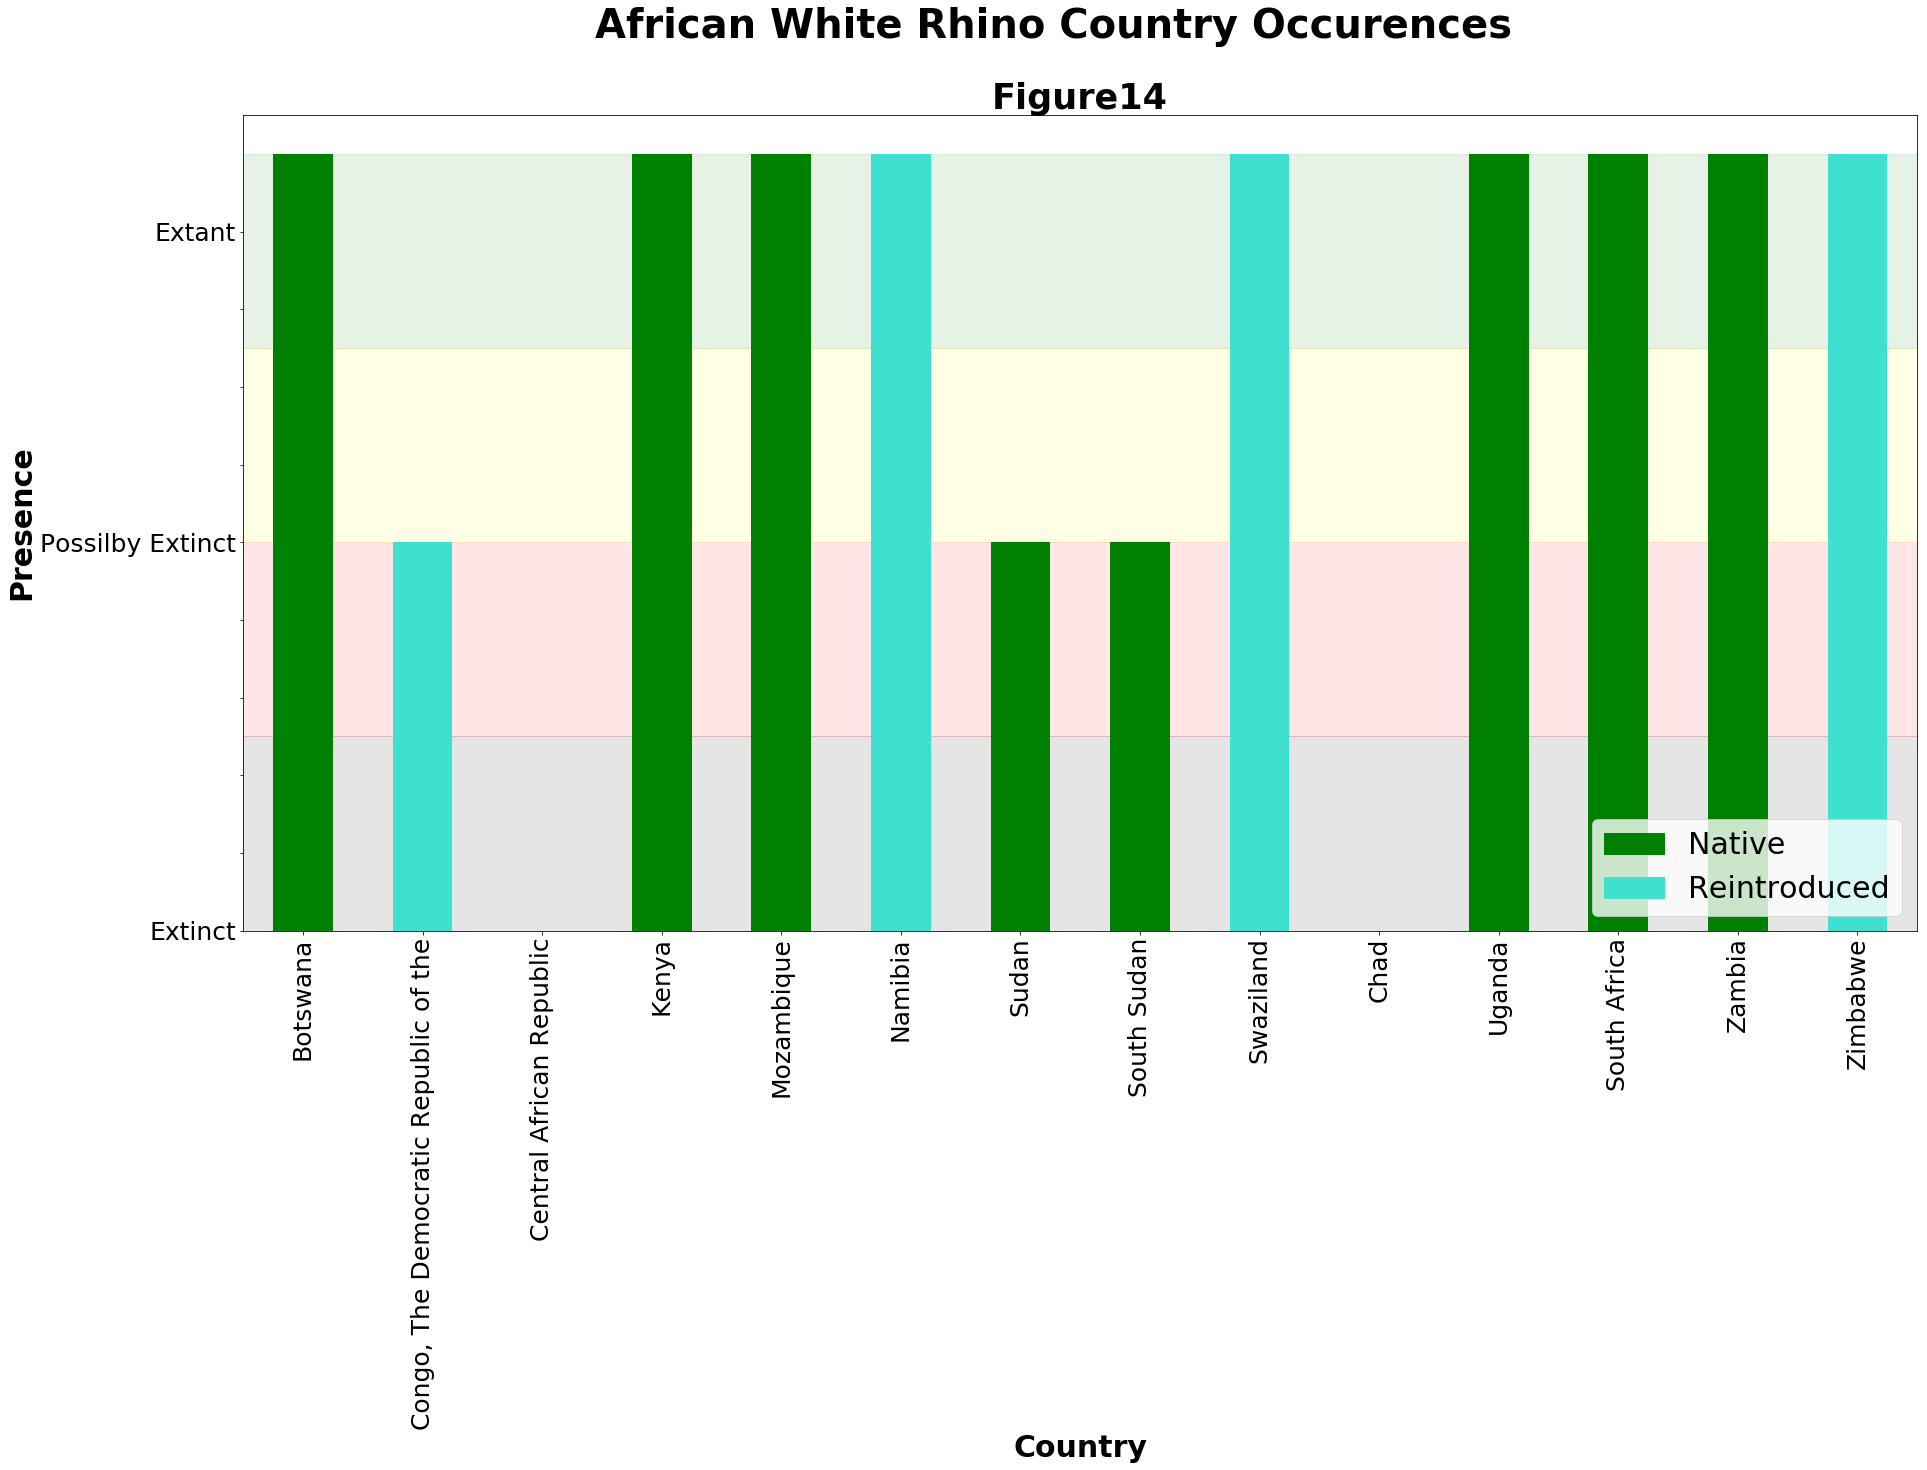

In [571]:
#plotting the white rhino distribution dataframe
fig,ax=plt.subplots()
plt.rcParams["figure.figsize"] = [30,15]
plt.axhspan(0,.25,alpha=0.1,color='black')
plt.axhspan(.25,.5,alpha=0.1,color='red')
plt.axhspan(.5,.75,alpha=0.1,color='yellow')
plt.axhspan(.75,1.0,alpha=0.1,color='green')
globe_subset[globe_subset['common_name']=='African White Rhino'].plot(x='country',y='pres_num',kind='bar',ax=ax,color=globe_subset['origin_color'])
ax.tick_params(axis='both',labelsize=25)
plt.legend(('Native','Reintroduced'),fontsize=30,loc=4)
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color('green')
leg.legendHandles[1].set_color('turquoise')
leg.legendHandles[0].set_alpha(1.0)
leg.legendHandles[1].set_alpha(1.0)
ax.set_ylabel("Presence",fontsize=30,fontweight='bold')
ax.set_xlabel("Country",fontsize=30,fontweight='bold')
ax.set_title("Figure14",fontsize=35,fontweight='bold')
fig.suptitle('African White Rhino Country Occurences',fontsize=40,fontweight='bold')
labels=['Extinct','','','','','Possilby Extinct','','','','Extant','']
plt.yticks(np.arange(0,1.0,.1),labels)

plt.show()

Figure 14 shows what countries the White Rhino is currently living in. We can see that in northern countries like Sudan and South Sudan white Rhino is going exinct. In fact, the last Male Northern White Rhino died on March 21st of this year. 

In [559]:
#Utilizing the Elephant Atlas API to draw the Elephant distribution
resp_1=requests.get('https://elephant-atlas.org/api/v1/countries')
newdata=resp_1.json()
resp_2=requests.get('https://elephant-atlas.org/api/v1/strata')
newdata_1=resp_2.json()

Text(48,0,'Malagarasi-Muyovosi Strata')

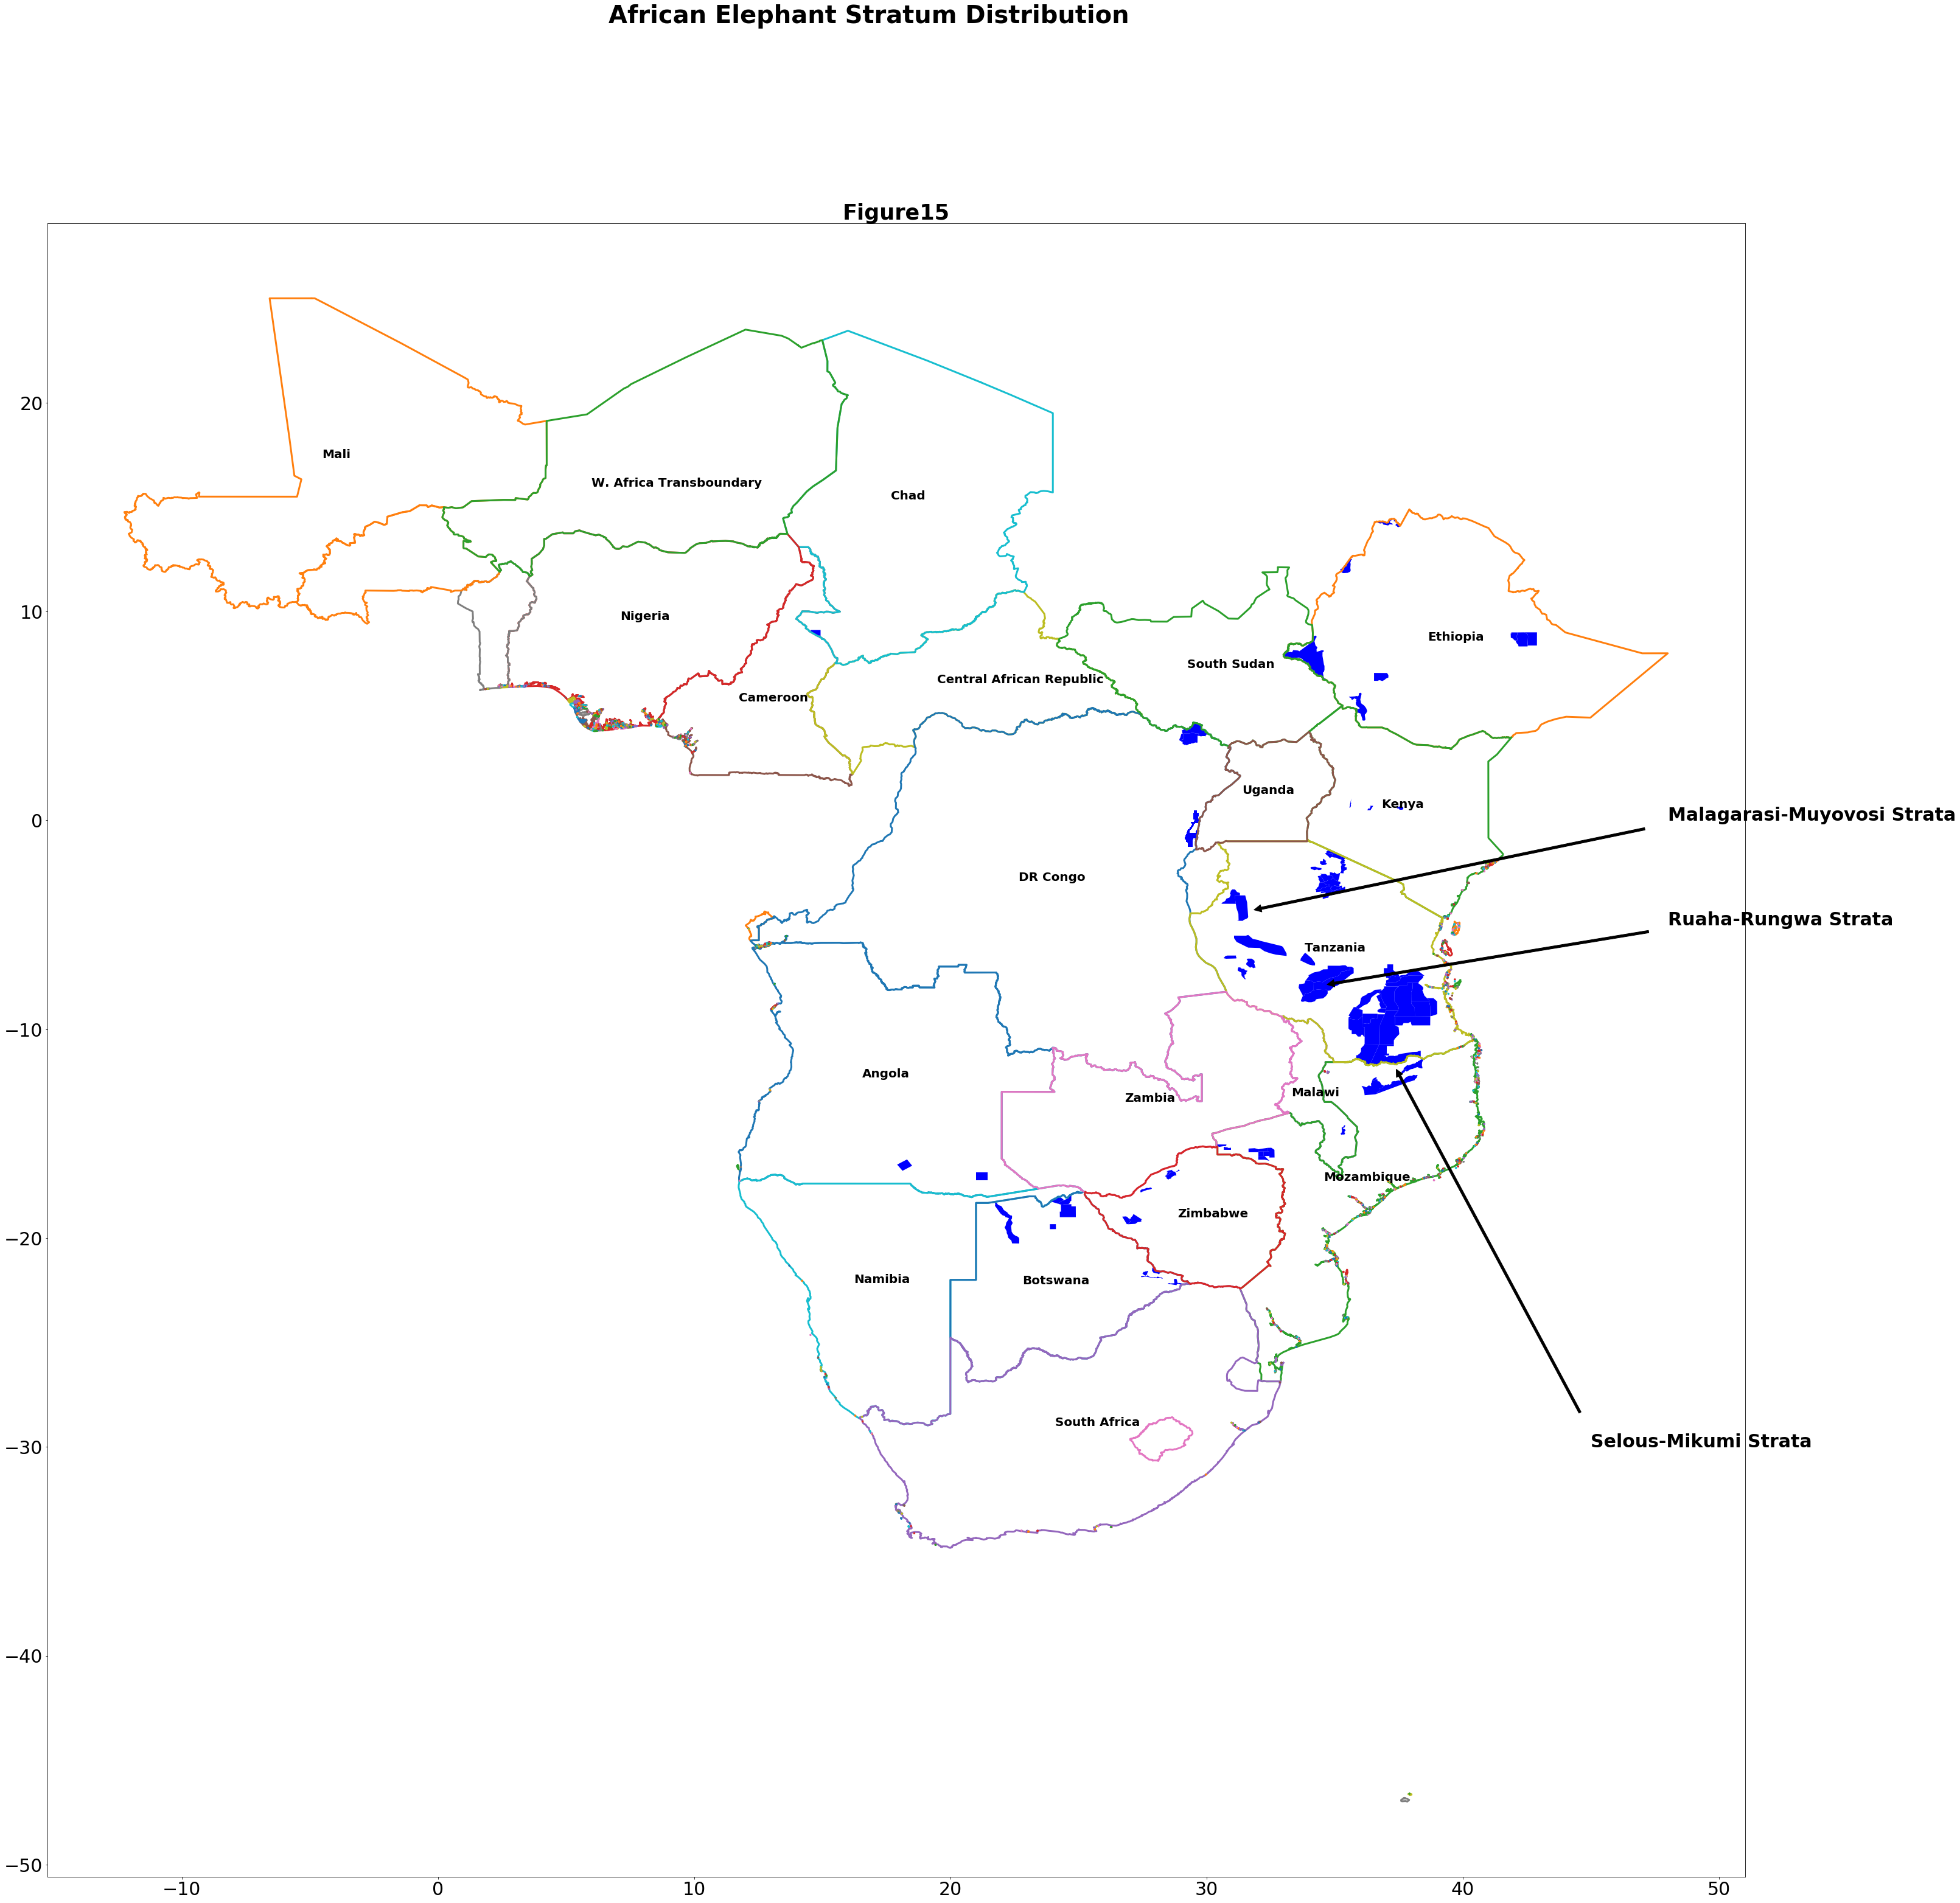

In [629]:
fig,ax=plt.subplots()
for h in range(len(newdata)):#Plots the outlines of African Countries
    for i in range(len(newdata[h]['country_boundary']['coordinates'])):
        for j in range(len(newdata[h]['country_boundary']['coordinates'][i])):
            coord=newdata[h]['country_boundary']['coordinates'][i][j]
            xs,ys=zip(*coord)
            #plt.plot(xs,ys)
            ax.plot(xs,ys,linewidth=3,alpha=1.0)
for l in range(len(newdata)):#plots the names of the countries
    coord=newdata[l]['centroid']['coordinates']
    x,y=coord
    plt.annotate(str(newdata[l]['name']),xy=(x-1,y),fontsize=20,fontweight='bold')    
for a in range(len(newdata_1)):#plots stratum of elephants
    if 'stratum_boundary' in newdata_1[a].keys():
        for b in range(len(newdata_1[a]['stratum_boundary']['coordinates'])):
            coord=newdata_1[a]['stratum_boundary']['coordinates'][b][b]
            x=[]
            y=[]
            for l in range(len(coord)):
                x.append(coord[l][0])
                y.append(coord[l][1])
            ax.fill(x,y,'b')
plt.rcParams["figure.figsize"] = [50,50]
ax.set_title("Figure15",fontsize=35,fontweight='bold')
fig.suptitle('African Elephant Stratum Distribution',fontsize=40,fontweight='bold')
ax.tick_params(axis='both',labelsize=30)
plt.annotate("Selous-Mikumi Strata",fontsize=30,fontweight='bold',xy=(37,-11),
             xycoords='data',xytext=(45,-30),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate("Ruaha-Rungwa Strata",fontsize=30,fontweight='bold',xy=(34,-8),
             xycoords='data',xytext=(48,-5),arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate("Malagarasi-Muyovosi Strata",fontsize=30,fontweight='bold',xy=(31,-4.5),
             xycoords='data',xytext=(48,0),arrowprops=dict(facecolor='black', shrink=0.05))


Figure 15 shows a fragment of the African continent, and in blue shows some of the locations of the largest African Elephant strata. The three largest are labeled and are all located in Tanzania. This is because Tanzania has some of the largest game preserves on the continent, and the Tanzanian government is one of the most active in trying to tackle the poaching epidemic on the continent over the past 10 years. However, this government activity has come after almost 90% of Tanzanian elephants have disappeared over the past 40 years according to [CNN](https://www.cnn.com/2018/04/11/africa/tanzania-collaring-wwf-elephants/index.html). 

### Part 5: Conclusion

While the situation may be dire, hope cannot be abandoned. There are people and organizations who are constantly innovating new ways to protect these species. For example, [Air Shepherd](http://airshepherd.org/) is utilizing drones to provide surveillance and give early poaching warnings to park rangers. 

Additionally, while this project was able to collect compelling data describing the problems these animals are facing, it is worth noting that much of the in-depth population data either remains to be collected, or is not publically available. The issues obtaining accurate population data are due in part to the lack of capital in many of these African countries to perform routine in-depth surveys, and also in part due to the behaviors of these animals. Many of these animals, like the African Elephant have populations that reside in dense forests for a majority of their life, making it difficult for aerial surveys (the most common kind of survey) to capture accurate population figures. Hopefully, as these survey measures become cheaper and more effective(like with drones), more accurate population figures can be collected and analyzed. 

Biodiversity is our shared heritage and if we all became more conscious about the larger members of our animal family, we could really reverse these alarming trends. Hopefully, we will not need to witness another extinction like the Northern White Rhinos in the future.